## Capstone project by Oliver Giera

# Evaluation of the risk profiles of investments on a P2P lending platform

## 1) The problem

**Intro**

In the current low interest rate environment, several new investment opportunities surface but are oftentimes superficially understood and lack appropriate investment strategies. Peer-to-peer lending is one of these and has been growing significantly in recent years. From an crowdfunding like lending of private to private individuals it has become a valid investment opportunity for professionals and even institutions. The few platforms offering P2P-lenders and borrowers a marketplace are scaling up fast and had to come up with very standardized processes to grade risk rating. Since P2P lending is not only about picking an investment with a given risk grading, but differentiation among investments with similar risk ratings and picking the right one, it is clear that there is information available that is not incorporated in current risk ratings and could provide investors with an advantage.

**Problem**

The current risk ratings of investment are solely based on the **credit history** of the relative applicant for a private loan. The potential lenders can look at other characteristics, like purpose, job title, frequency of P2P loans etc. and make their decision to invest or not for a given risk rating with respectively given interest rate. The key to success for P2P loans is, naturally, to select the **higher rated risk investments that will not default**. This means that **among investments with high assigned risk, P2P investors need to find the ones they consider less risky than their rating suggests**. Therefore, some structured additional insights through data analytics would add value to the investment selection. The dataset includes fully, on-time paid loans as well as late, (partly) recovered, and defaulted loans. What I am aiming to do is ultimately train a model on the data labeled with the investment outcome, which will be used as an indicator for risky/non risky investments. This will take into account all the given and engineered features and lead to a separate rating of risky/not risky for investments. Relative predicted risks can then be compared with the grade that was given by the platform and show whether the risk according to credit history is over-/under- or correctly valued. If the risk from the platform is higher than predicted, the investment can be seen as a good one. As investments with low investment risk rarely default and are of little interest if one aims to use P2P lending as a tool that outperforms conventional assets, this analysis will only focus on the highest risk grades with according interest rates.

## 2) The data

### (a) Clear overview of data

**Source** of the data is this comprehensive, consolidated set from kaggle that containes all lending club transactional data between 2007 up to Q4 in 2018: https://www.kaggle.com/wordsforthewise/lending-club/version/3#rejected_2007_to_2018Q4.csv.gz 

The data is distributed among two sets: accepted and rejected. For our risk analysis the rejected samples will not add much value, since there is no reason for rejection given. We will therefore only focus on the accepted ones. As mentioned above there is a feature that classifies the loans as fully paid, late, recovered etc.. Based on these classifications we will define what should be considered risky and try to predict it (elaboration follows). 

Overview:

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
df.head(10)

/anaconda3/envs/exts-ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

several useful fields, however, standardization and cleaning is required (e.g. term, emp_title, emp_len etc.)

**Information in the data set**

Upon creating an account, lendingclub.com provides a list with explanations to all features in the dataset. I downloaded that separately from here: https://www.lendingclub.com/info/download-data.action. 

In [2]:
desc_df = pd.read_excel('LCDataDictionary_current.xlsx')

In [3]:
pd.set_option('max_colwidth', 200)
desc_df

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [4]:
df.shape

(2260701, 151)

In [5]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

In [6]:
df.isnull().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

while a long set of features is available, many related to loans being in distress. this is particularly uncommon for the lower risk grades, therefore these features contain many null values since the features are not applicable. Other null values will be explored in more detail later.

**Target**

the target variable will be based on the final outcome of the loan. Thus, the loans currently in progress will add no value to our analysis:

In [7]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

as introduced, we are interested in loans that have been in distress and the ones that have been fully paid with no issues; thus, the three values we need are 'Fully paid', 'Charged off' and 'Default'. The other loans currently in progress will not be included since it is not clear whether they will turn out to have been risky or not. The dataset consists of sufficient values for this separation, however, we need to see how it is for the high risk investments as these are the target of our analysis. For this we will only look at investments with the highest interest rates, which is indicated by the relative assigned risk grade:

/anaconda3/envs/exts-ml/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/exts-ml/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


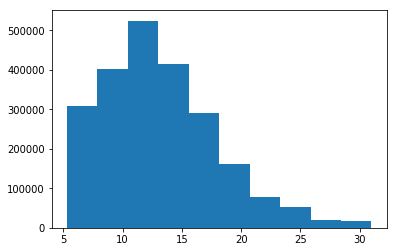

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(df['int_rate'], bins=10);



In [9]:
df['grade'].value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

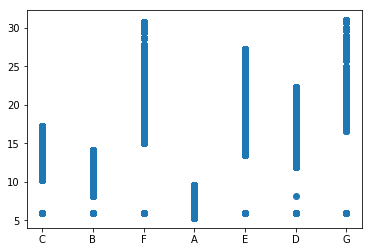

In [10]:
plt.scatter(df['grade'].dropna(), df['int_rate'].dropna());

visible that, except for one or more outliers, from E up the ratings are relatively consistently above 15% interest, which is where P2P investments outperform most conventional investments available for private lenders. Since that is what we are looking for and since the amount of samples in these three ratings still easily suffices for meaningful analysis, we will drop all other ratings

### (b) Plan to manage and process the data

**Cleaning**

as demonstrated above, there are many missing values that need to be taken care of

some columns contain numeric data (employment length e.g.) but several special characters make their data type strings - these need to be cleaned and converted to be recognized appropriately

we further need to take care of some outliers with suspicious interest rates

**engineering**

- perform one-hot encoding on categorical features
- develop new features based on important features for our task, particularly messy features like job_title
- log transform potentially skewed continuous features

further steps to follow after EDA

## 3) Exploratory data analysis (EDA)

### (a) Preliminary EDA

should be only done with the investments we are interested in, which will be the ratings from E and lower:

**Target variable**

since we are particularly interested in predicting the non-risky investments with high interest rates we wil look at the number of samples with rating E and lower (as dicussed):

In [11]:
df = df.loc[((df['grade'] == 'E') | (df['grade'] == 'F') | (df['grade'] == 'G')), :]

In [12]:
df['grade'].value_counts()

E    135639
F     41800
G     12168
Name: grade, dtype: int64

In [13]:
df['loan_status'].value_counts()

Fully Paid                                             79754
Charged Off                                            55086
Current                                                49030
Late (31-120 days)                                      3042
In Grace Period                                         1141
Does not meet the credit policy. Status:Fully Paid       654
Late (16-30 days)                                        570
Does not meet the credit policy. Status:Charged Off      323
Default                                                    7
Name: loan_status, dtype: int64

In [14]:
df.head().sort_values(by='int_rate', ascending=False)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
31,68341789,NaN,24250.0,24250.0,24250.0,60 months,24.24,701.01,F,F3,hvac technician,4 years,MORTGAGE,75000.0,Not Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68341789,NaN,debt_consolidation,NaN,114xx,NY,20.84,0.0,Apr-2007,660.0,664.0,0.0,NaN,NaN,18.0,0.0,24799.0,65.3,21.0,w,0.00,0.00,4124.42,4124.42,1332.69,2791.73,0.0,0.0,0.000,Jul-2016,701.01,NaN,Mar-2018,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,320098.0,2.0,1.0,0.0,1.0,14.0,13676.0,75.0,2.0,10.0,3138.0,61.0,38000.0,1.0,1.0,3.0,13.0,17783.0,9044.0,68.9,0.0,0.0,93.0,104.0,2.0,2.0,2.0,2.0,NaN,7.0,NaN,0.0,10.0,12.0,11.0,12.0,2.0,15.0,16.0,12.0,18.0,0.0,0.0,0.0,3.0,100.0,63.6,0.0,0.0,344960.0,38475.0,29100.0,18300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68476807,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.50,11740.50,10400.00,1340.50,0.0,0.0,0.000,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.

In [15]:
df['int_rate'].mean()

23.029428080186907

the average interest rate is far in the high risk area, therefore the selected samples are suitable for the analysis. The investment set is dominated by E investments, however the ratio of charged off and defaulted investments differs only slightly between the three grades. As the interest rates are consistently high for all of them, they will be treated as generally higher-risk investments and not distinguished among any further

**Reasoning behind target variable**

we will only use 'Fully Paid', 'Charged Off' and 'Default' where we can definetely make claims over whether the investment was risky or not. For the current ones and also the late ones, we do not now the exact circumstances and including forgotten payments or transfer issues as risky investments would dilute the result. We will try to predict whether an investment should be viewed as risky (**indicated by Charged Off and Default in the historical data**) and or non-risky (**indicated by Fully Paid in the historical data**). Charged off, per definition, indicates that not the full loan could be paid back and was written off as **bad debt** for investors as no further payment can be expected. Default would be the most extreme case of these but occured an insignificant times only. Since the goal of all investments definitely is to get paid back in full, additional to the relative interest, all loans that can not be paid back fully should be considered risky - hence, our target variable. 

using  these samples we receive a dataset with still 135k samples, that should be sufficient for training, validating and testing a model. It contains more non-risky than risky investments which we will account for by selecting relative performance metrics, adequate also for the cost of false predictions (elaborated in later chapter). 

In [16]:
df.set_index('id', inplace=True)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [18]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_cols = list(numeric_df.columns)

In [19]:
numeric_cols

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',

In [20]:
len(numeric_df.columns)

113

/anaconda3/envs/exts-ml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6575: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/anaconda3/envs/exts-ml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6576: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/anaconda3/envs/exts-ml/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/exts-ml/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


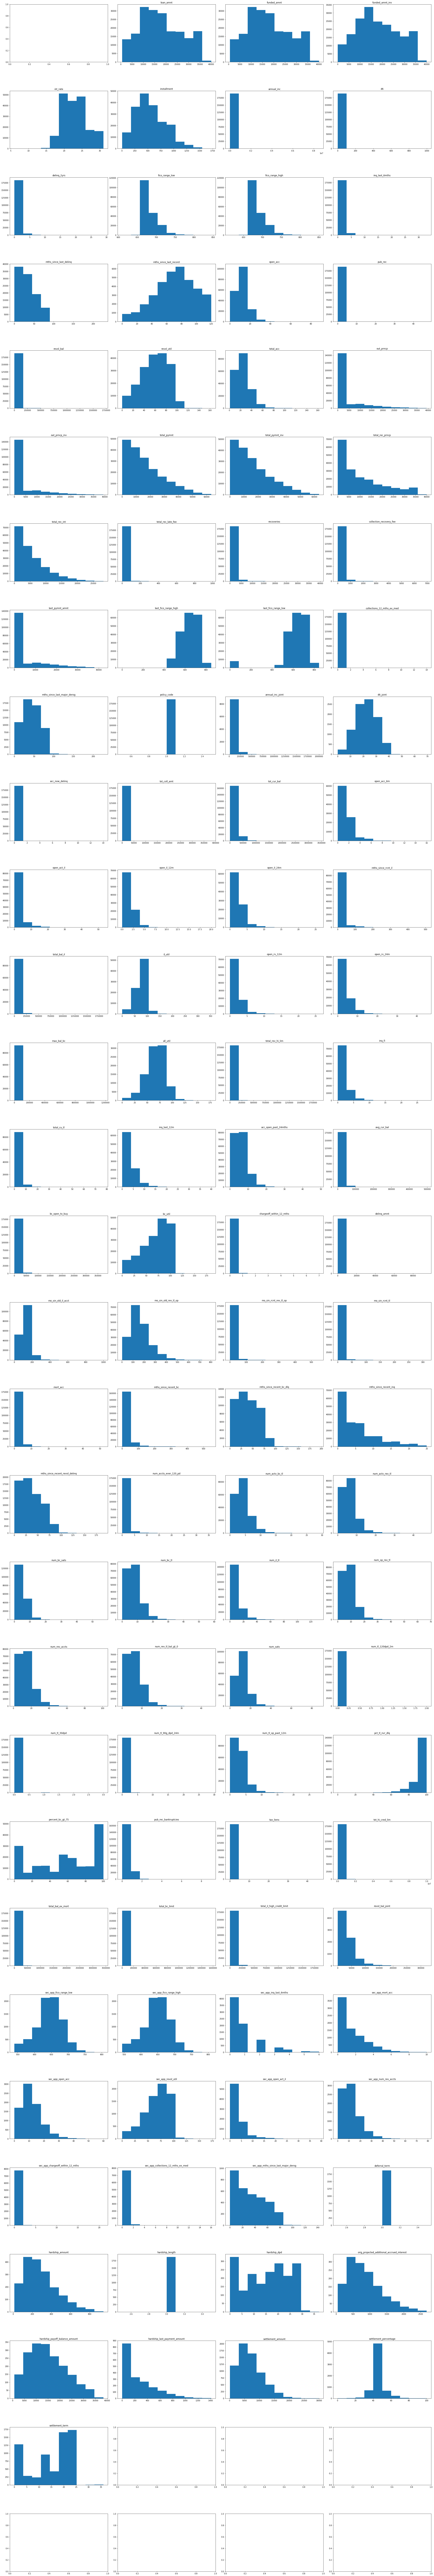

In [21]:
import seaborn as sns
%matplotlib inline


fig, axs = plt.subplots(nrows=30,ncols=4, figsize=(40, 250), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel()

for i in range(len(numeric_df.columns)):
# various errors with values for histograms, thus running with try and excep to obtain the feasible histograms
    try:
        
        axs[i].hist(numeric_df.iloc[:, i], bins=10)
        axs[i].set_title(numeric_df.columns[i])
        
    except:
        pass
    

Insights: 

- several features have only limited non null values as seen before. This is hard to observe in a histogram, however, it is one of the reasons some features consist mainly of one bin with several outliers (like joint account features)
- several numeric variables are heavily skewed. we are going to look into them in more detail and then  standardize them later on


examining  the other columns and whether some data may be wrongfully stored as strings:

In [22]:
df.select_dtypes('object').head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68476807,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68476807,NaN,major_purchase,Major purchase,174xx,PA,Jun-1998,w,Jul-2016,NaN,Mar-2018,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
66624733,60 months,E,E2,Software Manager,7 years,RENT,Not Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=66624733,NaN,debt_consolidation,Debt consolidation,916xx,CA,Jun-2005,w,May-2017,NaN,Nov-2017,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
68495092,36 months,E,E3,Program Coordinator,8 years,RENT,Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68495092,NaN,debt_consolidation,Debt consolidation,462xx,IN,Mar-2005,w,May-2016,NaN,Jun-2016,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
68341789,60 months,F,F3,hvac technician,4 years,MORTGAGE,Not Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68341789,NaN,debt_consolidation,NaN,114xx,NY,Apr-2007,w,Jul-2016,NaN,Mar-2018,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
68617034,60 months,E,E4,Senior Service Specialist,2 years,RENT,Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68617034,NaN,debt_consolidation,Debt consolidation,430xx,OH,Oct-2005,w,Mar-2019,Apr-2019,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN


In [23]:
df['term'].value_counts()

 60 months    127997
 36 months     61610
Name: term, dtype: int64

since there are only 2 available terms and they do not seem to be ordinal, I will use them as a one-hot encoded categorical variable

In [24]:
df['emp_length'].value_counts()

10+ years    62275
2 years      17134
< 1 year     15414
3 years      15219
1 year       12401
5 years      11781
4 years      11500
6 years       8778
8 years       8351
7 years       8161
9 years       7022
Name: emp_length, dtype: int64

turning emp length into a continuous variable; 10+ will just become 10; below 1 year will be classified as no working tenure at all 

In [25]:
def transform(s):
    s=s.str.replace('+', '')
    s=s.str.replace(' years', '')
    s=s.str.replace('< 1 year', '0')
    s=s.str.replace(' year', '')
    return s

In [26]:
emp_lens = df['emp_length']
emp_lens[100:102]

id
68385884     8 years
68386097    < 1 year
Name: emp_length, dtype: object

In [27]:
emp_lens_transf = transform(emp_lens)
emp_lens_transf[:10]

id
68476807     3
66624733     7
68495092     8
68341789     4
68617034     2
68341799     0
68366999    10
68436934    10
68376217     2
68566702     8
Name: emp_length, dtype: object

 NA values likely have not worked at all

In [28]:
emp_lens_transf = emp_lens_transf.astype('float')
emp_lens_transf.dtype

dtype('float64')

In [29]:
df['emp_length'] = emp_lens_transf
df['emp_length'].head(3)

id
68476807    3.0
66624733    7.0
68495092    8.0
Name: emp_length, dtype: float64

In [30]:
df.isnull().sum()

member_id                                     189607
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      12899
emp_length                                     11571
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                                0
desc                                          

plenty of null values
- reoccurring 33 seems to be generally empty entries;
- high amount of null values for the settlement/hardship entries, which makes sense since only small amount had to be settled - can be replaced with 'NA'; 
- many other object-columns are likely null when they are just not applicable and can be treated similarly; 
- some columns cannot have any value like 'next payment date' - will also be replaced with NA
- continuous columns will be filled with mathematical method

In [31]:
df['settlement_status'].value_counts()

ACTIVE      2856
COMPLETE    2555
BROKEN      1176
Name: settlement_status, dtype: int64

In [32]:
df.loc[(df['settlement_status']=='COMPLETE'), :].head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68415837,NaN,16000.0,16000.0,16000.0,60 months,19.48,419.29,E,E2,Production Superintendent,10.0,OWN,105000.0,Source Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68415837,NaN,debt_consolidation,Debt consolidation,980xx,WA,7.62,1.0,Feb-2005,660.0,664.0,0.0,23.0,NaN,4.0,0.0,4973.0,99.5,16.0,w,0.0,0.0,13252.26,13252.26,3094.45,4052.81,0.00,6105.00,1098.9000,Jun-2017,419.29,NaN,Mar-2019,589.0,585.0,0.0,44.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,334047.0,0.0,1.0,0.0,0.0,29.0,15481.0,62.0,0.0,0.0,3490.0,69.0,5000.0,1.0,6.0,0.0,0.0,83512.0,10.0,99.7,0.0,0.0,104.0,111.0,25.0,25.0,4.0,25.0,66.0,22.0,58.0,2.0,1.0,2.0,1.0,3.0,7.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,100.0,0.0,0.0,352581.0,20454.0,3500.0,24811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y,Mar-2019,COMPLETE,Oct-2018,5353.00,45.01,12.0
68474351,NaN,35000.0,35000.0,35000.0,36 months,18.99,1282.79,E,E1,Contract Specialist,7.0,OWN,96437.0,Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68474351,NaN,debt_consolidation,Debt consolidation,320xx,FL,25.29,0.0,Aug-1991,670.0,674.0,3.0,NaN,NaN,13.0,0.0,49798.0,64.3,36.0,w,0.0,0.0,18050.54,18050.54,2221.53,1670.39,64.14,14094.48,2537.0064,Jul-2016,200.00,NaN,Aug-2018,619.0,615.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,355116.0,2.0,1.0,1.0,1.0,5.0,51850.0,NaN

their loan status is always 'Charged off', which  means all the **charged off** required settlements, which confirms us in the assumptions thta these investments performed worse and should be considered more risky:

In [33]:
df['loan_status'].value_counts()




Fully Paid                                             79754
Charged Off                                            55086
Current                                                49030
Late (31-120 days)                                      3042
In Grace Period                                         1141
Does not meet the credit policy. Status:Fully Paid       654
Late (16-30 days)                                        570
Does not meet the credit policy. Status:Charged Off      323
Default                                                    7
Name: loan_status, dtype: int64

but significantly more 'Charged off':

In [34]:
df.loc[((df['loan_status']=='Charged Off') & (df['settlement_status'].isnull())), :].head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7.0,RENT,150000.0,Not Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=66624733,NaN,debt_consolidation,Debt consolidation,916xx,CA,9.39,0.0,Jun-2005,665.0,669.0,1.0,NaN,75.0,18.0,1.0,14052.0,40.7,27.0,w,0.0,0.0,9452.74,9452.74,3481.86,4351.98,0.0,1618.90,291.4020,May-2017,471.70,NaN,Nov-2017,584.0,580.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500.0,2.0,1.0,2.0,7.0,2014.0,5128.0,51.3,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,NaN,2.0,NaN,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,10300.0,31319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
68341789,NaN,24250.0,24250.0,24250.0,60 months,24.24,701.01,F,F3,hvac technician,4.0,MORTGAGE,75000.0,Not Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68341789,NaN,debt_consolidation,NaN,114xx,NY,20.84,0.0,Apr-2007,660.0,664.0,0.0,NaN,NaN,18.0,0.0,24799.0,65.3,21.0,w,0.0,0.0,4124.42,4124.42,1332.69,2791.73,0.0,0.00,0.0000,Jul-2016,701.01,NaN,Mar-2018,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,320098.0,2.0,1.0,0.0,1.0,14.0,13676.0,75.0,2.0,10.0,3138.0,61.0,38000.0,1.0,1.0,3.0,13.0,17783.0,9044

In [35]:
df.loc[((df['loan_status']=='Fully Paid') & (df['settlement_status'] == 'COMPLETE')), :].head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


this confirms that fully paid loans have never even been in settlement, therefore we can recognize them as the non-risky investments. the charged off investments where the loan was never fully paid back but no more payments are being made can be considered risky. let's explore the available features for these samples more:

In [36]:
df.loc[((df['loan_status']=='Charged Off') & (~df['hardship_type'].isnull())), :].head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68426668,NaN,5475.0,5475.0,5475.0,36 months,18.99,200.67,E,E1,Captain,10.0,MORTGAGE,108000.0,Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68426668,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.47,4.0,Dec-1999,670.0,674.0,2.0,15.0,NaN,11.0,0.0,3045.0,41.0,27.0,w,0.0,0.0,4302.40,4302.40,2504.60,1393.48,0.00,404.32,72.7776,Nov-2017,47.01,NaN,Mar-2019,649.0,645.0,0.0,35.0,1.0,Individual,NaN,NaN,NaN,0.0,95.0,316524.0,4.0,4.0,2.0,3.0,1.0,118276.0,88.0,3.0,3.0,1086.0,41.0,7450.0,1.0,0.0,7.0,7.0,28774.0,1063.0,62.0,0.0,0.0,143.0,192.0,4.0,1.0,2.0,7.0,20.0,0.0,20.0,0.0,4.0,6.0,3.0,5.0,17.0,6.0,8.0,5.0,11.0,NaN,0.0,0.0,6.0,78.0,75.0,0.0,0.0,337523.0,121321.0,4250.0,134612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,BROKEN,3.0,47.01,Sep-2017,Dec-2017,Oct-2017,3.0,26.0,Late (16-30 days),NaN,3058.14,61.23,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
68405879,NaN,32400.0,32400.0,32400.0,60 months,25.09,952.70,F,F4,Firefighter EMT,10.0,RENT,85000.0,Source Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68405879,NaN,debt_consolidation,Debt consolidation,028xx,RI,25.92,0.0,Oct-2004,660.0,664.0,0.0,74.0,54.0,12.0,2.0,18875.0,59.0,33.0,f,0.0,0.0,19510.96,19510.96,5150.14,10549.91,0.00,3810.91,685.9638,Jul-2017,569.75,NaN,Nov-2017,599.0,595.0,0.0,74.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,

hardship features seem interesting but unfortunately have no relation to the features available when the loan has been made, thus are useless for us. 

**dropping all samples that are not finished investments**:

In [37]:
df = df.loc[((df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off') | (df['loan_status'] == 'Default')), :]

Let's look at the features and the information they can provide to predict risk. With >150 features it would be good to reduce them for computation and interpretability reasons

also quickly preparing a df that displays us the NaN values so we can use this information to decide what features make sense to use:

In [38]:
null_df = pd.DataFrame(df.isnull().sum())
null_df = null_df.reset_index()

In [39]:
null_df.sort_values(by='index').transpose()

,59,77,22,72,12,56,55,78,79,80,81,45,52,143,144,131,24,82,18,142,23,57,25,10,9,27,26,2,3,7,132,137,134,127,141,136,138,140,129,133,130,128,11,68,36,74,76,28,6,5,14,49,50,51,47,46,1,15,71,0,83,84,85,86,87,29,53,30,66,88,89,90,91,48,92,93,94,95,96,97,98,99,100,101,102,103,104,105,31,62,63,64,65,69,70,139,37,38,135,106,107,54,32,108,19,16,44,33,114,34,124,125,117,116,115,118,119,126,123,120,122,121,147,146,148,145,149,8,109,4,20,60,61,110,35,111,67,112,75,113,39,40,42,43,41,73,17,13,58,21
index,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,debt_settlement_flag_date,deferral_term,delinq_2yrs,delinq_amnt,desc,disbursement_method,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,payment_plan_start_date,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_mths_since_last_major_derog,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,settlement_amount,settlement_date,settlement_percentage,settlement_status,settlement_term,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0,4874,0,85878,0,131834,0,6645,7096,7193,5,0,5,0,128378,133817,0,0,123429,0,45,131834,0,7482,8211,0,0,0,0,0,133817,133817,133817,0,133817,133817,133817,133817,133817,133817,133817,133817,0,90583,0,85872,85872,0,0,0,0,5,0,0,0,594,0,0,85872,134847,10728,6641,6641,6641,4874,63401,95167,109248,87012,6971,100618,11645,87533,134840,6641,6641,6641,5583,6641,6641,6641,6641,6641,5583,12049,6641,6641,6641,0,85872,85872,85872,85872,85872,85872,134247,0,0,133817,6655,7134,0,0,52,0,0,0,0,132695,140,132695,132695,132695,132695,132695,132695,132695,133926,132695,132695,132695,132753,128378,128378,128378,128378,128378,0,3,0,1913,6641,6641,6641,0,4874,85872,4874,85872,6641,0,0,0,0,0,6641,0,0,131844,0


In [40]:
desc_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152
LoanStatNew,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verified_status_joint,zip_code,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,NaN,NaN
Description,The number of accounts on which the borrower is now delinquent.,Number of trades opened in past 24 months.,The state provided by the borrower in the loan application,Balance to credit limit on all trades,The self-reported annual income provided by the borrower during registration.,The combined self-reported annual income provided by the co-borrowers during registration,Indicates whether the loan is an individual application or a joint application with two co-borrowers,Average current balance of all accounts,Total open to buy on revolving bankcards.,Ratio of total current balance to high credit/credit limit for all bankcard accounts.,Number of charge-offs within 12 months,post charge off collection fee,Number of collections in 12 months excluding medical collections,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,The past-due amount owed for the accounts on which the borrower is now delinquent.,Loan description provided by the borrower,"A ratio calculated using the borrowe

- past trade activity of the borrower (like acc_now_delinq or acc_open_past_24mths) seems to be interesting for predicting defualt and will be kept
- all address related columns will be dropped since it is unlikely that they could provide valuable information for the target
- Balance to credit limit will be very useful since it indicates the ability to pay
- Income related columns are ofc very valuable, this includes the binary columns whether the income has been verfified
- joint applications will just be treated as individual ones
- current balances columns will be kept 
- features related to past charge-offs like chargeoff_within_12mths are likely valuable to predict future chargeoffs and will be kept, correlation among them will be tested as well 
- debt settlement information will be dropped from the feature set since this information is not available when making the investment
- delinquent features seem useful for prediction (indicating that someone is unlawfull late on payments)
- description would be nice for sentiment analysis but is empty in almost all cases, so will be dropped
- dti seems to be a good ratio for prediction; dti joint will be deleted
- past credit information like earliest credit line will be kept 
- employment related infomration will be kept as well when it is managable, emp_title is completely unstandardized and will thus be dropped after feature engineering
- fico scores seem useful, should heavily correlate though (FICO is a credit rating of an individual borrower)
- the amount of the loan will be kept, however just the amount funded bc that is what the (non-)default will be based on; 
- hardship information is not available when making the investment, thus will be dropped
- Since the grading system of the platform is based on the credit history of the borrower, we will drop it and keep in the credit information individually so the model can figure out what credit features have the most informative value based on the default
- home ownership/rent/mortgage features will be kept since they contain information about wealth and liquidity
- interest rate is derived from the inherent rating and will be dropped
- time since last records or activity seems useful and will be kept
- bankcard related accounts might also give good indications and will be kept
- previous payments, interests and fees will be kept but examined whether they heavily correlate
- verfitication status will be used as well


In [41]:
df['application_type'].value_counts()


Individual    131834
Joint App       3013
Name: application_type, dtype: int64

very few values generally, so unlikely to add value anyways

now dropping all features that are **not available when making the investment**:

In [42]:
col_df = pd.DataFrame(df.columns)

In [43]:
col_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [44]:
desc_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152
LoanStatNew,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verified_status_joint,zip_code,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,NaN,NaN
Description,The number of accounts on which the borrower is now delinquent.,Number of trades opened in past 24 months.,The state provided by the borrower in the loan application,Balance to credit limit on all trades,The self-reported annual income provided by the borrower during registration.,The combined self-reported annual income provided by the co-borrowers during registration,Indicates whether the loan is an individual application or a joint application with two co-borrowers,Average current balance of all accounts,Total open to buy on revolving bankcards.,Ratio of total current balance to high credit/credit limit for all bankcard accounts.,Number of charge-offs within 12 months,post charge off collection fee,Number of collections in 12 months excluding medical collections,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,The past-due amount owed for the accounts on which the borrower is now delinquent.,Loan description provided by the borrower,"A ratio calculated using the borrowe

we can safely drop all columns related to hardship and settlements: 

In [45]:
df = df.iloc[:, :127]
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog'], dtype='object', length=127)

issue date and payment plan both also not available:

In [46]:

df.drop(['issue_d', 'pymnt_plan'], axis=1, inplace=True)

outstanding amounts of principal loan are also not applicable, since only looking at finished investments:

In [47]:
df.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

all payments and interest received to date as well as recoveries are not available when making the investment in a new loan:

In [48]:
df.drop(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'], axis=1, inplace=True)

remaining columns represent only information available at time of investment:

In [49]:
df.shape

(134847, 112)

In [50]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3.0,MORTGAGE,104433.0,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=68476807,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7.0,RENT,150000.0,Not Verified,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=66624733,NaN,debt_consolidation,Debt consolidation,916xx,CA,9.39,0.0,Jun-2005,665.0,669.0,1.0,NaN,75.0,18.0,1.0,14052.0,40.7,27.0,w,584.0,580.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500.0,2.0,1.0,2.0,7.0,2014.0,5128.0,51.3,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,NaN,2.0,NaN,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,10300.0,31319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68495092,NaN,8650.0,8650.0,8650.0,36 months,19.89,320.99,E,E3,Program Coordinator,8.0,RENT,55000.0,Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=68495092,NaN,debt_consolidation,Debt consolidation,462xx,IN,25.49,0.0,Mar-2005,675.0,679.0,4.0,NaN,30.0,18.0,1.0,9568.0,46.0,19.0,w,639.0,635.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,18926.0,6.0,1.0,0.0,1.0,19.0,9358.0,51.0,12.0,16.0,653.0,46.0,20750.0,2.0,0.0,5.0,17.0,1051.0,1375.0,45.0,0.0,0.0,129.0,95.0,0.0,0.0,0.0,8.0,NaN,0.0,NaN,0.0,2.0,17.0,2.0,2.0,2.0,17.0,17.0,13.0,18.0,NaN,0.0,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68341789,NaN,24250.0,24250.0,24250.0,60 months,24.24,701.01,F,F3,hvac technician,4.0,M

we can drop the grade columns, since we want to make our own judgement about the risk profile:

In [51]:
df.drop(['grade', 'sub_grade'], axis=1, inplace=True)

funded amount also not available when investing:

In [52]:
df.drop(['funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)

installments are besically just a combination of term and loan amount:

In [53]:
df.drop(['installment'], axis=1, inplace=True)

interest rate is directly related to the investment grade, thus will be dropped, but will be kept for now to take care of outliers later 

url does not add any value:

state is unlikely to add value, we will keep post code though, since specific geographic information might add value as demographics and economic status might be area typical:

In [54]:
df.drop(['url', 'addr_state'], axis=1, inplace=True)

In [55]:
col_df = pd.DataFrame(df.columns)

In [56]:
col_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,member_id,loan_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,zip_code,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog


before removing the columns with high collinearity, all numeric columns should be recognized as numeric:

In [57]:
df.dtypes

member_id                              float64
loan_amnt                              float64
term                                    object
int_rate                               float64
emp_title                               object
emp_length                             float64
home_ownership                          object
annual_inc                             float64
verification_status                     object
loan_status                             object
desc                                    object
purpose                                 object
title                                   object
zip_code                                object
dti                                    float64
delinq_2yrs                            float64
earliest_cr_line                        object
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
mths_since_la

from earliest credit line, we can strip all but the year and convert it to numeric:

In [58]:
df['earliest_cr_line'] = df['earliest_cr_line'].str.replace("[^0-9]",'')

In [59]:
df['earliest_cr_line'][:5]

id
68476807    1998
66624733    2005
68495092    2005
68341789    2007
68366999    2007
Name: earliest_cr_line, dtype: object

In [60]:
df['earliest_cr_line'] = df['earliest_cr_line'].astype('float')

In [61]:
df['sec_app_earliest_cr_line'] = df['sec_app_earliest_cr_line'].str.replace("[^0-9]",'')
df['sec_app_earliest_cr_line'] = df['sec_app_earliest_cr_line'].astype('float')

before takign care of more operations, we can look at what columns are almost completely empty:

In [62]:

df.isnull().sum()

member_id                              134847
loan_amnt                                   0
term                                        0
int_rate                                    0
emp_title                                8211
emp_length                               7482
home_ownership                              0
annual_inc                                  0
verification_status                         0
loan_status                                 0
desc                                   123429
purpose                                     0
title                                    1913
zip_code                                    0
dti                                        45
delinq_2yrs                                 0
earliest_cr_line                            0
fico_range_low                              0
fico_range_high                             0
inq_last_6mths                              0
mths_since_last_delinq                  63401
mths_since_last_record            

all with more than 130k missin values will add little to no value and will thus be dropped:

In [63]:
df.dropna(thresh = 5000, axis = 1, inplace = True)
round(df.isnull().mean()*100)

loan_amnt                          0.0
term                               0.0
int_rate                           0.0
emp_title                          6.0
emp_length                         6.0
home_ownership                     0.0
annual_inc                         0.0
verification_status                0.0
loan_status                        0.0
desc                              92.0
purpose                            0.0
title                              1.0
zip_code                           0.0
dti                                0.0
delinq_2yrs                        0.0
earliest_cr_line                   0.0
fico_range_low                     0.0
fico_range_high                    0.0
inq_last_6mths                     0.0
mths_since_last_delinq            47.0
mths_since_last_record            81.0
open_acc                           0.0
pub_rec                            0.0
revol_bal                          0.0
revol_util                         0.0
total_acc                

description is missing too much to allow for valuable insights:

In [64]:
df.drop('desc', axis=1, inplace=True)

In [65]:
df.loc[(df['emp_title'].isnull() & df['emp_length'].isnull()),:].head()

,loan_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68484093,11550.0,36 months,18.99,NaN,NaN,MORTGAGE,28948.92,Verified,Fully Paid,credit_card,Credit card refinancing,993xx,18.41,0.0,2001.0,685.0,689.0,0.0,NaN,NaN,9.0,0.0,14858.0,77.8,13.0,w,719.0,715.0,0.0,NaN,1.0,Individual,0.0,0.0,73793.0,1.0,0.0,0.0,0.0,151.0,0.0,NaN,1.0,2.0,3469.0,78.0,19100.0,0.0,0.0,0.0,2.0,8199.0,2538.0,83.2,0.0,0.0,151.0,169.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,0.0,7.0,8.0,7.0,8.0,1.0,8.0,10.0,8.0,9.0,0.0,0.0,0.0,1.0,100.0,85.7,0.0,0.0,85868.0,14858.0,15100.0,0.0
68366309,11500.0,36 months,19.48,NaN,NaN,RENT,33888.00,Verified,Fully Paid,other,Other,234xx,39.16,0.0,1999.0,660.0,664.0,0.0,NaN,73.0,6.0,1.0,10585.0,59.1,23.0,w,704.0,700.0,0.0,NaN,1.0,Individual,0.0,0.0,35245.0,1.0,2.0,0.0,2.0,19.0,24660.0,69.0,1.0,2.0,7105.0,66.0,17900.0,3.0,7.0,1.0,4.0,5874.0,395.0,94.7,0.0,0.0,148.0,199.0,1.0,1.0,0.0,36.0,NaN,10.0,NaN,0.0,1.0,3.0,1.0,7.0,10.0,4.0,13.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,100.0,1.0,0.0,53634.0,35245.0,7500.0,35734.0
68062761,8675.0,36 months,19.89,NaN,NaN,MORTGAGE,36000.00,Verified,Fully Paid,debt_consolidation,Debt consolidation,212xx,33.93,0.0,1983.0,675.0,679.0,1.0,43.0,65.0,15.0,1.0,12997.0,54.0,27.0,w,649.0,645.0,0.0,31.0,1.0,Individual,0.0,216.0,115686.0,2.0,2.0,2.0,2.0,5.0,16882.0,95.0,4.0,6.0,2052.0,54.0,24280.0,1.0,3.0,4.0,9.0,8263.0,1567.0,77.0,0.0,0.0,125.0,388.0,5.0,5.0,2.0,5.0,79.0,5.0,43.0,0.0,7.0,11.0,12.0,13.0,6.0,11.0,18.0,10.0,14.0,NaN,0.0,0.0,6.0,89.0,66.7,0.0,0.0,134069.0,29879.0,9400.0,17789.0
68272601,12425.0,60 months,18.99,NaN,NaN,RENT,24897.72,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,124xx,6.62,0.0,1994.0,720.0,724.0,0.0,42.0,NaN,15.0,0.0,11239.0,18.7,31.0,w,729.0,725.0,0.0,42.0,1.0,Individual,0.0,0.0,11662.0,1.0,0.0,0.0,0.0,114.0,0.0,NaN,2.0,5.0,4434.0,19.0,60200.0,0.0,0.0,0.0,5.0,777.0,39961.0,22.0,0.0,0.0,114.0,254.0,3.0,3.0,4.0,9.0,NaN,13.0,46.0,1.0,6.0,6.0,8.0,11.0,1.0,14.0,24.0,6.0,15.0,0.0,0.0,0.0,2.0,90.3,12.5,0.0,0.0,60771.0,11662.0,51200.0,0.0
68496269,24000.0,60 months,21.48,NaN,NaN,MORTGAGE,57774.00,Verified,Charged Off,credit_card,Credit card refinancing,606xx,24.05,0.0,1993.0,695.0,699.0,1.0,46.0,NaN,10.0,0.0,23290.0,88.9,38.0,f,524.0,520.0,0.0,46.0,1.0,Individual,0.0,0.0,205995.0,2.0,1.0,1.0,1.0,1.0,27815.0,100.0,1.0,3.0,8568.0,94.0,26200.0,2.0,2.0,4.0,4.0,20600.0,2089.0,86.9,0.0,0.0,224.0,224.0,2.0,1.0,3.0,16.0,NaN,1.0,NaN,1.0,4.0,7.0,4.0,16.0,9.0,7.0,23.0,7.0,10.0,0.0,0.0,0.0,2.0,94.7,75.0,0.0,0.0,287155.0,51105.0,16000.0,27815.0


In [66]:
(df['emp_title'].isnull() & df['emp_length'].isnull()).sum()

7428

as suspected for all empty emp titles, emp length is also empty. accordingly, it can be suspected that these borrowers are unemployed:

In [67]:
df['emp_title'].fillna('unemployed', axis=0, inplace=True)

In [68]:
df['emp_title'].isnull().sum()

0

In [69]:
df['emp_length'].fillna(0, axis=0, inplace=True)

inspecting missing titles:

In [70]:
df[df['title'].isnull()].head()

,loan_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68341789,24250.0,60 months,24.24,hvac technician,4.0,MORTGAGE,75000.0,Not Verified,Charged Off,debt_consolidation,NaN,114xx,20.84,0.0,2007.0,660.0,664.0,0.0,NaN,NaN,18.0,0.0,24799.0,65.3,21.0,w,499.0,0.0,0.0,NaN,1.0,Individual,0.0,0.0,320098.0,2.0,1.0,0.0,1.0,14.0,13676.0,75.0,2.0,10.0,3138.0,61.0,38000.0,1.0,1.0,3.0,13.0,17783.0,9044.0,68.9,0.0,0.0,93.0,104.0,2.0,2.0,2.0,2.0,NaN,7.0,NaN,0.0,10.0,12.0,11.0,12.0,2.0,15.0,16.0,12.0,18.0,0.0,0.0,0.0,3.0,100.0,63.6,0.0,0.0,344960.0,38475.0,29100.0,18300.0
68338713,19225.0,60 months,26.99,OTR Truck Driver,0.0,MORTGAGE,56600.0,Verified,Charged Off,debt_consolidation,NaN,451xx,18.21,0.0,1990.0,710.0,714.0,1.0,51.0,28.0,8.0,1.0,7055.0,44.7,22.0,w,499.0,0.0,0.0,NaN,1.0,Individual,0.0,125.0,33946.0,5.0,3.0,3.0,3.0,3.0,26891.0,93.0,2.0,2.0,605.0,76.0,15800.0,2.0,4.0,5.0,5.0,4243.0,5847.0,12.7,0.0,0.0,122.0,308.0,2.0,2.0,0.0,2.0,NaN,0.0,51.0,0.0,2.0,4.0,3.0,5.0,10.0,5.0,12.0,4.0,8.0,0.0,0.0,0.0,5.0,90.5,33.3,0.0,1.0,44633.0,33946.0,6700.0,28833.0
68338594,24000.0,60 months,23.13,Coordinator,6.0,MORTGAGE,43435.0,Verified,Fully Paid,debt_consolidation,NaN,773xx,35.70,0.0,1998.0,680.0,684.0,0.0,NaN,84.0,13.0,1.0,12508.0,73.1,22.0,w,669.0,665.0,0.0,NaN,1.0,Joint App,0.0,156.0,182215.0,0.0,6.0,2.0,5.0,10.0,48582.0,75.0,0.0,1.0,5690.0,74.0,17100.0,1.0,2.0,1.0,6.0,14017.0,357.0,96.8,0.0,0.0,52.0,209.0,13.0,10.0,1.0,26.0,NaN,12.0,NaN,0.0,2.0,5.0,2.0,4.0,9.0,6.0,12.0,5.0,13.0,0.0,0.0,0.0,2.0,100.0,100.0,1.0,0.0,208064.0,61090.0,11000.0,61739.0
68340554,28000.0,60 months,22.45,Deputy Sheriff,8.0,RENT,93000.0,Source Verified,Fully Paid,debt_consolidation,NaN,935xx,17.73,0.0,2007.0,715.0,719.0,1.0,42.0,NaN,14.0,0.0,17698.0,33.5,19.0,w,719.0,715.0,0.0,NaN,1.0,Individual,0.0,0.0,41760.0,3.0,3.0,2.0,3.0,6.0,24062.0,45.0,4.0,5.0,5863.0,40.0,52800.0,1.0,4.0,1.0,8.0,2983.0,25202.0,41.3,0.0,0.0,57.0,97.0,6.0,6.0,0.0,6.0,NaN,0.0,42.0,0.0,5.0,5.0,7.0,9.0,4.0,11.0,15.0,5.0,14.0,0.0,0.0,0.0,6.0,94.7,14.3,0.0,0.0,105838.0,41760.0,42900.0,53038.0
68340491,20000.0,60 months,22.45,Financial Assistant,0.0,MORTGAGE,40000.0,Verified,Fully Paid,debt_consolidation,NaN,956xx,19.32,0.0,1998.0,680.0,684.0,1.0,NaN,65.0,10.0,1.0,7241.0,42.6,28.0,w,619.0,615.0,0.0,NaN,1.0,Individual,0.0,0.0,26578.0,3.0,2.0,1.0,2.0,6.0,19337.0,91.0,3.0,6.0,3114.0,69.0,17000.0,0.0,3.0,3.0,8.0,2658.0,7346.0,41.2,0.0,0.0,14.0,211.0,3.0,3.0,2.0,3.0,NaN,4.0,NaN,0.0,3.0,4.0,4.0,9.0,2.0,8.0,24.0,4.0,10.0,0.0,0.0,0.0,4.0,100.0,25.0,1.0,0.0,38365.0,26578.0,12500.0,21365.0


entries not of generally low quality, thus can be filled:

In [71]:
df['title'].fillna('title NA', axis=0, inplace=True)

public records likely have a high impact on risk, replacing with max probably not the optimal approach:

In [72]:
df['mths_since_last_record'].describe()

count    25599.000000
mean        70.659830
std         26.313338
min          0.000000
25%         53.000000
50%         72.000000
75%         90.000000
max        120.000000
Name: mths_since_last_record, dtype: float64

it is probably a good idea to make it a categorical variable, so that borrowers with no public records are clearly separated:

In [73]:
df['mths_since_last_record'] = pd.cut(df['mths_since_last_record'], bins=[0, 10, 50, 100, float('Inf')], labels=['<10', '10-50', '50-100', '100+'])





In [74]:
df['mths_since_last_record'].value_counts()

50-100    16096
10-50      5305
100+       3831
<10         316
Name: mths_since_last_record, dtype: int64

In [75]:
df['mths_since_last_record'].isnull().sum()

109299

now we can replace the nan with a category (need to add category first for fillna):

In [76]:
df['mths_since_last_record'] = df['mths_since_last_record'].cat.add_categories('no record')
df['mths_since_last_record'].fillna('no record', axis=0, inplace=True)

most are NaN for mths since last delinquency, which likely means that they never had any. We can treat this like public records: 

In [77]:
df['mths_since_last_delinq'] = pd.cut(df['mths_since_last_delinq'], bins=[0, 10, 50, 100, float('Inf')], labels=['<10', '10-50', '50-100', '100+'])


now we can replace the nan with a category (need to add category first for fillna):

In [78]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].cat.add_categories('no delinq')
df['mths_since_last_delinq'].fillna('no delinq', axis=0, inplace=True)

Months since last 90 day or worse rating is direct result from overdue accounts, thus will correlate and be covered with the later features - will be dropped:

In [79]:
df.drop('mths_since_last_major_derog', axis=1, inplace=True)

total current balance and collectable amounts seem to be connected:

In [80]:
df[['tot_coll_amt', 'tot_cur_bal']].describe()

,tot_coll_amt,tot_cur_bal
count,128206.000000,1.282060e+05
mean,232.921899,1.300067e+05
std,2123.440033,1.458175e+05
min,0.000000,0.000000e+00
25%,0.000000,3.075100e+04
50%,0.000000,6.983750e+04
75%,0.000000,1.912650e+05
max,380757.000000,3.408095e+06


In [81]:
df.loc[(df['tot_cur_bal'] == 0), 'tot_cur_bal'].count()

66

In [82]:
df.loc[(df['tot_coll_amt'].isnull() & df['tot_cur_bal'].isnull()),:].head()

,loan_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1072053,3000.0,36 months,18.64,MKC Accounting,9.0,RENT,48000.0,Source Verified,Fully Paid,car,Car Downpayment,900xx,5.35,0.0,2007.0,660.0,664.0,2.0,no delinq,no record,4.0,0.0,8221.0,87.5,4.0,f,689.0,685.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1071795,5600.0,60 months,21.28,unemployed,4.0,OWN,40000.0,Source Verified,Charged Off,small_business,Expand Business & Buy Debt Portfolio,958xx,5.55,0.0,2004.0,675.0,679.0,2.0,no delinq,no record,11.0,0.0,5210.0,32.6,13.0,f,499.0,0.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1069410,21000.0,60 months,19.91,Costco,7.0,RENT,50000.0,Verified,Charged Off,debt_consolidation,Bill pay of,980xx,21.58,0.0,1998.0,680.0,684.0,1.0,no delinq,no record,7.0,0.0,19448.0,97.6,14.0,f,624.0,620.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1068409,16000.0,60 months,19.91,CA Technologies,7.0,RENT,81000.0,Verified,Fully Paid,credit_card,refinance debt,017xx,20.52,0.0,1998.0,665.0,669.0,3.0,no delinq,no record,12.0,0.0,27884.0,75.1,21.0,f,709.0,705.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1068906,8200.0,60 months,21.28,autozone,4.0,RENT,75000.0,Source Verified,Charged Off,small_business,Small_Business Loan,912xx,12.48,0.0,2000.0,675.0,679.0,3.0,no delinq,no record,6.0,0.0,9012.0,73.9,11.0,f,684.0,680.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


since total amounts ever owed are 0 in most cases, we will assume these missing values also are 0; total current balance of all accounts is difficult and usually not 0, we will take the median for this feature since there are very high outliers that might dilute the mean:

In [83]:
df['tot_coll_amt'].fillna(0, axis=0, inplace=True)

In [84]:
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), axis=0, inplace=True)

for all columns regarding accounts for installments or general opened in recent time it is most liekly that nan means that they never had an account, thus the number is 0 in all cases:

In [85]:
df.loc[:,['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths']] = df[['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths']].fillna(0, axis=0)



In [86]:
df[['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'il_util', 'open_rv_12m']].isnull().sum()

open_acc_6m     0
open_act_il     0
open_il_12m     0
open_il_24m     0
total_bal_il    0
il_util         0
open_rv_12m     0
dtype: int64

In [87]:
df['avg_cur_bal'].describe()

count    128202.000000
mean      12000.703936
std       14415.111556
min           0.000000
25%        3130.000000
50%        6560.000000
75%       16240.000000
max      497484.000000
Name: avg_cur_bal, dtype: float64

In [88]:
df['avg_cur_bal'].corr(df['bc_open_to_buy'])

-0.003490828002086239

current balances that have not been stated are gonne be set to the minimum value of the relative column, which is 0:

In [89]:
df.loc[:,['avg_cur_bal', 'bc_open_to_buy', 'bc_util']] = df[['avg_cur_bal', 'bc_open_to_buy', 'bc_util']].fillna(0)

for months since last accounts opened we will use the maximum for the missing values since they likely did not open any recently. for the months since recent del of relative accounts we will drop the columns, since this will already be covered by mths since recent general del:

In [90]:
cols_mths = ['mo_sin_old_il_acct', 
             'mo_sin_old_rev_tl_op',
             'mo_sin_rcnt_rev_tl_op',
             'mo_sin_rcnt_tl',
             'mths_since_recent_bc',
             'mths_since_recent_inq']

for col in cols_mths:
    df[col] = df[col].fillna(df[col].max())

In [91]:
df[['mo_sin_old_il_acct', 
             'mo_sin_old_rev_tl_op',
             'mo_sin_rcnt_rev_tl_op',
             'mo_sin_rcnt_tl',
             'mths_since_recent_bc',
             'mths_since_recent_inq']].isnull().sum()

mo_sin_old_il_acct       0
mo_sin_old_rev_tl_op     0
mo_sin_rcnt_rev_tl_op    0
mo_sin_rcnt_tl           0
mths_since_recent_bc     0
mths_since_recent_inq    0
dtype: int64

In [92]:
df.drop(['mths_since_recent_revol_delinq', 'mths_since_recent_bc_dlq'], axis=1, inplace=True)

for all columsn regarding number of open accounts, we assume that missing values mean that there are no open accounts of this kind:

In [93]:
col_df = pd.DataFrame(df.columns)
col_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
0,loan_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [94]:
df.iloc[:, 61:75] = df.iloc[:, 61:75].fillna(0)

percentage of trades never delinquent can be assumed to be 100 if nothing is stated and percentage of bankcards over 75% of limit can be assumed to be 0:

In [95]:
df['pct_tl_nvr_dlq'].fillna(100, inplace=True)

In [96]:
df['percent_bc_gt_75'].fillna(0, inplace=True)

missing credit limits are unlikely to be 0 and thus will be replaced with relative median:

In [97]:
limits = ['tot_hi_cred_lim',
          'total_bc_limit',
          'total_il_high_credit_limit']

for col in limits:
    df[col] = df[col].fillna(df[col].median())

In [98]:
df['total_bal_ex_mort'].describe()

count    1.299730e+05
mean     5.286358e+04
std      4.811823e+04
min      0.000000e+00
25%      2.401400e+04
50%      4.123000e+04
75%      6.668700e+04
max      3.408095e+06
Name: total_bal_ex_mort, dtype: float64

In [99]:
df['total_bal_ex_mort'].median()

41230.0

it is difficult to deal with the missing credit limit after mortgage, but since credit accounts are available as well as mortgage this is just a combination of them and can be dropped:

In [100]:
df.drop('total_bal_ex_mort', axis=1, inplace=True)

for the missing number of mortgage accounts, it can be assumed that the borrower does not hve any:

In [101]:
df['mort_acc'].fillna(0, inplace=True)

In [102]:
df.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
purpose                           0
title                             0
zip_code                          0
dti                              45
delinq_2yrs                       0
earliest_cr_line                  0
fico_range_low                    0
fico_range_high                   0
inq_last_6mths                    0
mths_since_last_delinq            0
mths_since_last_record            0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      140
total_acc                         0
initial_list_status               0
last_fico_range_high              0
last_fico_range_low         

replacing month since most recent installment account with max, since most likely have non:

In [103]:
df['mths_since_rcnt_il'].fillna(df['mths_since_rcnt_il'].max(), inplace=True)

dti and revol util can be replaced with median, but will have little impact since almost no entries affected:

In [104]:
df['dti'].fillna(df['dti'].median(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

collections for recent 12 months likely never happened:

In [105]:
df['collections_12_mths_ex_med'].fillna(0, inplace=True)

num_tl_op_past_12m has been forgotten before:

In [106]:
df['num_tl_op_past_12m'].fillna(0, inplace=True)

bankruptcies and tax is likely not applicable as well:

In [107]:
df['pub_rec_bankruptcies'].fillna(0, inplace=True)
df['tax_liens'].fillna(0, inplace=True)

In [108]:
df.isnull().sum().sum()

5

In [109]:
df['chargeoff_within_12_mths'].fillna(0, inplace=True)

treating all applications as individual:

In [110]:
df.drop('application_type', axis=1, inplace=True)

looking at zip code:

In [111]:
df['zip_code'].nunique()

888

too many to handle appropriately:

In [112]:
df.drop('zip_code', axis = 1, inplace= True)

In [113]:
df['purpose'].value_counts()

debt_consolidation    86973
credit_card           14039
other                 11590
home_improvement       8141
small_business         3933
major_purchase         2651
medical                1892
house                  1694
moving                 1647
car                     916
vacation                836
wedding                 329
renewable_energy        187
educational              19
Name: purpose, dtype: int64

In [114]:
df['title'].nunique()

8178

purpose serves as a valuable categorical feature, summing up the many differing titles, thus will be kept whereas title will be dropped:

In [115]:
df.drop('title', axis=1, inplace=True)

In [116]:
df['emp_title'].value_counts()[:60]

unemployed                  8211
Manager                     1995
Teacher                     1807
Supervisor                   969
Owner                        904
Driver                       839
Registered Nurse             801
Sales                        706
RN                           689
Office Manager               544
Project Manager              527
manager                      517
General Manager              492
driver                       445
owner                        395
Director                     385
Engineer                     368
Operations Manager           344
teacher                      334
Administrative Assistant     322
Truck Driver                 315
Accountant                   298
supervisor                   295
President                    292
Nurse                        288
Executive Assistant          281
Store Manager                280
Sales Manager                271
Police Officer               269
Vice President               265
Account Ma

emp_title offers some opportunities for feature engineering. the feature likely adds some informative power so it would be benficial to distinguish between unemployed, leadership, owners, teachers, engineers, assistants and other positions. accordingly going to define some categories:

In [117]:
a = ['assistant', 'office', 'secretary', 'administration', 'administrator']
b = ['teacher']
c = ['unemployed']
d = ['owner', 'founder' ,'ceo']
e = ['engineer', 'programmer', 'developer', 'software', 'specialist']
f = ['sales']
g = ['manager', 'director', 'president', 'executive']
h = ['nurse']
i = ['analyst', 'consultant', 'controller', 'accountant', 'financial', 'finance']
j = ['driver', 'operator']
l = ['supervisor', 'coordinator', 'lead']
m = ['service', 'server', 'waiter', 'clerk']
n = ['technician', 'mechanic', 'electrican', 'builder']

aa ='assistant'
bb ='teacher'
cc = 'unemployed'
dd = 'owner'
ee = 'engineer'
ff = 'sales'
gg = 'leadership'
hh = 'nurse'
ii = 'analyst'
jj = 'driver'
ll = 'midlevel'
mm = 'service'
nn = 'technician'

o = 'other'

dic = {aa:a, bb:b, cc:c, dd:d, ee:e, ff:f, gg:g, hh:h, ii:i, jj:j, ll:l, mm:m, nn:n}

df['job_new'] = o

for k, v in dic.items():
    pat = '|'.join(v)
    mask = df['emp_title'].str.contains(pat, case=False)

    df.loc[mask, 'job_new'] = k

In [118]:
df['job_new'].value_counts()

other         53936
leadership    22085
unemployed     8211
midlevel       7476
assistant      6918
engineer       6105
analyst        5807
service        5675
driver         5362
technician     3746
teacher        2799
sales          2594
nurse          2307
owner          1826
Name: job_new, dtype: int64

managed to find categories for more than half of all samples

In [119]:
df.drop('emp_title', axis=1, inplace=True)

**outliers**

before taking care of coll now would be a good time to handle outliers:

In [120]:
df['int_rate'].describe()

count    134847.000000
mean         22.487057
std           3.230021
min           6.000000
25%          19.990000
50%          21.990000
75%          24.500000
max          30.990000
Name: int_rate, dtype: float64

the values seem reasonable and are not overly impacted by the outliers. The min value of 6 however seems unreasonable in this risk range. Looking into it further and removing:

In [121]:
(df['int_rate'] < 10).sum()

53

In [122]:
df.loc[(df['int_rate'] < 10), :]

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,job_new
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66024347,13675.0,60 months,6.0,0.0,RENT,36000.0,Verified,Fully Paid,credit_card,32.30,0.0,2007.0,690.0,694.0,0.0,10-50,no record,8.0,0.0,3508.0,25.1,22.0,w,689.0,685.0,0.0,1.0,0.0,0.0,25090.0,1.0,3.0,1.0,3.0,3.0,21582.0,81.0,2.0,3.0,1277.0,62.0,14000.0,1.0,0.0,2.0,6.0,3136.0,2492.0,42.0,0.0,0.0,104.0,97.0,7.0,3.0,0.0,7.0,7.0,1.0,2.0,3.0,3.0,3.0,17.0,5.0,5.0,3.0,8.0,0.0,0.0,0.0,3.0,86.4,33.3,0.0,0.0,40567.0,4300.0,26567.0,unemployed
65606769,15000.0,60 months,6.0,9.0,RENT,42000.0,Verified,Fully Paid,debt_consolidation,31.14,1.0,1996.0,700.0,704.0,1.0,<10,100+,16.0,1.0,20133.0,42.5,53.0,f,719.0,715.0,0.0,1.0,0.0,0.0,65243.0,0.0,0.0,0.0,0.0,381.0,0.0,0.0,0.0,0.0,0.0,0.0,47400.0,0.0,0.0,0.0,10.0,4350.0,6896.0,71.7,0.0,0.0,229.0,211.0,7.0,2.0,0.0,7.0,0.0,0.0,5.0,6.0,6.0,10.0,34.0,10.0,17.0,6.0,16.0,0.0,0.0,0.0,7.0,100.0,40.0,1.0,0.0,104145.0,24400.0,56675.0,technician
65128431,11525.0,60 months,6.0,1.0,RENT,40000.0,Verified,Charged Off,moving,7.57,0.0,2009.0,715.0,719.0,0.0,no delinq,no record,7.0,0.0,6030.0,42.2,9.0,w,574.0,570.0,0.0,1.0,0.0,0.0,6030.0,0.0,0.0,0.0,0.0,381.0,0.0,0.0,0.0,0.0,0.0,0.0,14300.0,0.0,0.0,0.0,3.0,861.0,892.0,75.9,0.0,0.0,79.0,53.0,14.0,14.0,0.0,21.0,25.0,0.0,2.0,4.0,2.0,2.0,2.0,7.0,7.0,5.0,7.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,14300.0,3700.0,0.0,other
63958569,15000.0,60 months,6.0,7.0,MORTGAGE,65000.0,Source Verified,Fully Paid,credit_card,23.19,0.0,2006.0,660.0,664.0,0.0,10-50,no record,8.0,0.0,25088.0,85.9,16.0,f,669.0,665.0,0.0,1.0,0.0,0.0,39161.0,0.0,0.0,0.0,0.0,381.0,0.0,0.0,0.0,0.0,0.0,0.0,29200.0,0.0,0.0,0.0,3.0,5594.0,1287.0,92.4,0.0,0.0,67.0,114.0,20.0,9.0,0.0,20.0,5.0,0.0,3.0,5.0,3.0,7.0,3.0,7.0,13.0,6.0,8.0,0.0,0.0,0.0,2.0,93.7,100.0,0.0,0.0,44749.0,17000.0,15549.0,other
62115626,13375.0,60 months,6.0,7.0,RENT,60000.0,Source Verified,Fully Paid,debt_consolidation,15.44,0.0,2004.0,685.0,689.0,0.0,50-100,no record,8.0,0.0,2940.0,19.2,33.0,w,684.0,680.0,0.0,1.0,0.0,4159.0,45272.0,0.0,0.0,0.0,0.0,381.0,0.0,0.0,0.0,0.0,0.0,0.0,15300.0,0.0,0.0,0.0,7.0,6467.0,5800.0,0.0,0.0,0.0,131.0,127.0,9.0,8.0,0.0,15.0,7.0,2.0,0.0,1.0,3.0,7.0,20.0,6.0,13.0,1.0,8.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,59578.0,5800.0,44278.0,technician
58532959,22000.0,60 months,6.0,6.0,RENT,55000.0,Verified,Charged Off,debt_consolidation,37.60,0.0,2005.0,660.0,664.0,2.0,50-100,no record,12.0,0.0,14008.0,67.0,18.0,w,589.0,585.0,0.0,1.0,0.0,0.0,54583.0,0.0,0.0,0.0,0.0,381.0,0.0,0.0,0.0,0.0,0.0,0.0,20900.0,0.0,0.0,0.0,7.0,4962.0,2004.0,80.7,0.0,0.0,123.0,117.0,3.0,3.0,0.0,11.0,0.0,0.0,3.0,5.0,3.0,6.0,7.0,6.0,11.0,5.0,12.0,0.0,0.0,0.0,4.0,83.3,66.7,0.0,0.0,69967.0,10400.0,49067.0,technician
55970409,27300.0,36 months,6.0,3.0,MORTGAGE,65000.0,Not Verified,Fully Paid,home_improvement,12.02,0.0,1993.0,670.0,674.0,0.0,10-50,n

the interest rate is directly derived from the risk grade, thus, an interest rate of 6% in the risk range of E to G does not make sense and must be due to error. This is also backed by the fact that all values are exactly 6. Accordingly we will drop these outliers.

In [123]:
df = df.loc[(df['int_rate'] > 10), :]

In [124]:
df['int_rate'].describe()

count    134794.000000
mean         22.493540
std           3.214066
min          13.430000
25%          19.990000
50%          21.990000
75%          24.500000
max          30.990000
Name: int_rate, dtype: float64

This now seems reasonable for our risk range

In [125]:
df.drop('int_rate', axis=1, inplace=True)

**Multicollinearity**

several features are very closely related and we can expect multicollinearity; we will check for this using a correlation matrix:

In [126]:
df_num = df._get_numeric_data() 

df_num.head()

,loan_amnt,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68476807,10400.0,3.0,104433.0,25.37,1.0,1998.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,704.0,700.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,20300.0,88097.0
66624733,18000.0,7.0,150000.0,9.39,0.0,2005.0,665.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,584.0,580.0,0.0,1.0,0.0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500.0,2.0,1.0,2.0,7.0,2014.0,5128.0,51.3,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,2.0,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,10300.0,31319.0
68495092,8650.0,8.0,55000.0,25.49,0.0,2005.0,675.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,639.0,635.0,0.0,1.0,0.0,0.0,18926.0,6.0,1.0,0.0,1.0,19.0,9358.0,51.0,12.0,16.0,653.0,46.0,20750.0,2.0,0.0,5.0,17.0,1051.0,1375.0,45.0,0.0,0.0,129.0,95.0,0.0,0.0,0.0,8.0,0.0,0.0,2.0,17.0,2.0,2.0,2.0,17.0,17.0,13.0,18.0,0.0,0.0,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,2750.0,18248.0
68341789,24250.0,4.0,75000.0,20.84,0.0,2007.0,660.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,499.0,0.0,0.0,1.0,0.0,0.0,320098.0,2.0,1.0,0.0,1.0,14.0,13676.0,75.0,2.0,10.0,3138.0,61.0,38000.0,1.0,1.0,3.0,13.0,17783.0,9044.0,68.9,0.0,0.0,93.0,104.0,2.0,2.0,2.0,2.0,7.0,0.0,10.0,12.0,11.0,12.0,2.0,15.0,16.0,12.0,18.0,0.0,0.0,0.0,3.0,100.0,63.6,0.0,0.0,344960.0,29100.0,18300.0
68366999,15850.0,10.0,45000.0,34.85,0.0,2007.0,755.0,759.0,1.0,18.0,0.0,8799.0,21.3,24.0,744.0,740.0,0.0,1.0,0.0,25.0,45025.0,3.0,2.0,2.0,3.0,5.0,36226.0,84.0,2.0,2.0,6833.0,53.0,41300.0,1.0,0.0,1.0,5.0,2649.0,12808.0,35.6,0.0,0.0,90.0,107.0,2.0,2.0,0.0,10.0,5.0,0.0,2.0,4.0,4.0,4.0,7.0,16.0,17.0,4.0,18.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,84300.0,19900.0,43000.0


In [127]:
corr = df_num.drop('policy_code', axis=1).corr()
corr.style.background_gradient(cmap='RdBu_r', axis=None)

visible that there are several high correlations in the dataset, we want to remove one feature of each pair that is close to 1:

In [128]:
def get_redundant_pairs(df_num):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df_num.columns
    for i in range(0, df_num.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# using absolute will give us highest pos and neg correlation
def get_top_abs_correlations(df_num, n=10):
    au_corr = df_num.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df_num)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top Absolute Correlations")
print(get_top_abs_correlations(df_num))



Top Absolute Correlations
fico_range_low         fico_range_high        1.000000
mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl         0.990126
num_actv_rev_tl        num_rev_tl_bal_gt_0    0.985878
tot_cur_bal            tot_hi_cred_lim        0.975092
mths_since_rcnt_il     all_util               0.932876
open_acc               num_sats               0.924176
mths_since_rcnt_il     il_util                0.908643
il_util                all_util               0.905242
open_rv_12m            open_rv_24m            0.866388
bc_util                percent_bc_gt_75       0.862698
dtype: float64


we will remove the second feature of each pair that is above 95% correlation:

In [129]:
df = df.drop(['fico_range_high', 'mo_sin_rcnt_tl', 'num_rev_tl_bal_gt_0', 'tot_hi_cred_lim'], axis = 1)

In [130]:
df.shape

(134794, 75)

plenty remaining features including the target variable

**encoding**:

In [131]:
df.head(5)

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,job_new
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68476807,10400.0,60 months,3.0,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,25.37,1.0,1998.0,695.0,3.0,10-50,no record,12.0,0.0,21929.0,64.5,35.0,w,704.0,700.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,20300.0,88097.0,engineer
66624733,18000.0,60 months,7.0,RENT,150000.0,Not Verified,Charged Off,debt_consolidation,9.39,0.0,2005.0,665.0,1.0,no delinq,50-100,18.0,1.0,14052.0,40.7,27.0,w,584.0,580.0,0.0,1.0,0.0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500.0,2.0,1.0,2.0,7.0,2014.0,5128.0,51.3,0.0,0.0,115.0,112.0,1.0,2.0,9.0,2.0,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,10300.0,31319.0,leadership
68495092,8650.0,36 months,8.0,RENT,55000.0,Verified,Fully Paid,debt_consolidation,25.49,0.0,2005.0,675.0,4.0,no delinq,10-50,18.0,1.0,9568.0,46.0,19.0,w,639.0,635.0,0.0,1.0,0.0,0.0,18926.0,6.0,1.0,0.0,1.0,19.0,9358.0,51.0,12.0,16.0,653.0,46.0,20750.0,2.0,0.0,5.0,17.0,1051.0,1375.0,45.0,0.0,0.0,129.0,95.0,0.0,0.0,8.0,0.0,0.0,2.0,17.0,2.0,2.0,2.0,17.0,17.0,18.0,0.0,0.0,0.0,12.0,100.0,50.0,1.0,0.0,2750.0,18248.0,midlevel
68341789,24250.0,60 months,4.0,MORTGAGE,75000.0,Not Verified,Charged Off,debt_consolidation,20.84,0.0,2007.0,660.0,0.0,no delinq,no record,18.0,0.0,24799.0,65.3,21.0,w,499.0,0.0,0.0,1.0,0.0,0.0,320098.0,2.0,1.0,0.0,1.0,14.0,13676.0,75.0,2.0,10.0,3138.0,61.0,38000.0,1.0,1.0,3.0,13.0,17783.0,9044.0,68.9,0.0,0.0,93.0,104.0,2.0,2.0,2.0,7.0,0.0,10.0,12.0,11.0,12.0,2.0,15.0,16.0,18.0,0.0,0.0,0.0,3.0,100.0,63.6,0.0,0.0,29100.0,18300.0,technician
68366999,15850.0,60 months,10.0,OWN,45000.0,Not Verified,Fully Paid,debt_consolidation,34.85,0.0,2007.0,755.0,1.0,no delinq,no record,18.0,0.0,8799.0,21.3,24.0,f,744.0,740.0,0.0,1.0,0.0,25.0,45025.0,3.0,2.0,2.0,3.0,5.0,36226.0,84.0,2.0,2.0,6833.0,53.0,41300.0,1.0,0.0,1.0,5.0,2649.0,12808.0,35.6,0.0,0.0,90.0,107.0,2.0,0.0,10.0,5.0,0.0,2.0,4.0,4.0,4.0,7.0,16.0,17.0,18.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,19900.0,43000.0,midlevel


In [132]:
one_hot = ['term',
          'home_ownership',
          'mths_since_last_delinq',
          'mths_since_last_record',
          'verification_status',
          'purpose',
          'initial_list_status',
          'job_new']

In [133]:
all_cols = list(df.columns)
cont_columns = [x for x in all_cols if (x not in one_hot)]
cont_columns

['loan_amnt',
 'emp_length',
 'annual_inc',
 'loan_status',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',


In [134]:
cont_columns.remove('loan_status')

for encoding, we will also directly apply log transformation to all continuous features to take care of the skewness of several variables:

In [135]:
import numpy as np
# manual preprocess function
def preprocess(df):
    
    df = pd.get_dummies(df, columns=one_hot, dummy_na=True)
        
    
    df[cont_columns] = np.log1p(df[cont_columns])
    
    return df

df_proc = preprocess(df)
df_proc.head()

,loan_amnt,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,term_ 36 months,term_ 60 months,term_nan,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,home_ownership_nan,mths_since_last_delinq_<10,mths_since_last_delinq_10-50,mths_since_last_delinq_50-100,mths_since_last_delinq_100+,mths_since_last_delinq_no delinq,mths_since_last_delinq_nan,mths_since_last_record_<10,mths_since_last_record_10-50,mths_since_last_record_50-100,mths_since_last_record_100+,mths_since_last_record_no record,mths_since_last_record_nan,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,verification_status_nan,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,initial_list_status_f,initial_list_status_w,initial_list_status_nan,job_new_analyst,job_new_assistant,job_new_driver,job_new_engineer,job_new_leadership,job_new_midlevel,job_new_nurse,job_new_other,job_new_owner,job_new_sales,job_new_service,job_new_teacher,job_new_technician,job_new_unemployed,job_new_nan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68476807,9.249657,1.386294,11.556311,Fully Paid,3.272227,0.693147,7.600402,6.545350,1.386294,2.564949,0.000000,9.995611,4.182050,3.583519,6.558198,6.552508,0.0,0.693147,0.0,0.000000,12.712080,0.693147,1.386294,0.000000,1.386294,2.708050,11.209656,4.442651,1.609438,2.079442,9.180190,4.369448,10.434145,1.098612,0.693147,1.386294,2.397895,10.227200,8.426831,4.363099,0.0,0.0,4.859812,5.351858,1.609438,1.945910,1.609438,0.693147,0.0,1.609438,1.945910,1.791759,2.302585,2.397895,2.079442,2.995732,2.564949,0.0,0.0,0.0,1.609438,4.580877,4.110874,0.000000,0.0,9.918425,11.386205,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
66624733,9.798183,2.079442,11.918397,Charged Off,2.340844,0.000000,7.603898,6.501290,0.693147,2.944439,0.693147,9.550591,3.730501,3.332205,6.371612,6.364751,0.0,0.693147,0.0,4.110874,10.498139,1.098612,1.098612,0.693147,1.386294,1.098612,10.007667,4.276666,1.098612,1.609438,7.148346,4.025352,10.448744,1.098612,0.693147,1.098612,2.079442,7.608374,8.542666,3.956996,0.0,0.0,4.753590,4.727388,0.693147,1.098612,2.302585,1.098612,0.0,1.945910,2.639057,2.079442,2.197225,1.945910,2.833213,2.995732,2.944439,0.0,0.0,0.0,1.386294,4.615121,2.727853,0.693147,0.0,9.239996,10.352012,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
68495092,9.065430,2.197225,10.915107,Fully Paid,3.276767,0.000000,7.603898,6.516193,1.609438,2.944439,0.693147,9.166284,3.850148,2.995732,6.461468,6.455199,0.0,0.693147,0.0,0.000000,9.848345,1.945910,0.693147,0.000000,0.693147,2.995732,9.144094,3.951244,2.564949,2.833213,6.483107,3.850

need to encode the target variable as binary for risky and not risky, whereas fully paid will be considered not risky and charged off as well as defaulted will be regarded as risky:

In [136]:
df_proc['loan_status'] = df_proc['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1, 'Default': 1})

again, we will only use 'Fully Paid', 'Charged Off' and 'Default' where we can definetely make claims over whether the investment was risky or not. Having 0 as the non-risky target that we will want to predict as realiably as possible, we need to consider this in our decision for an appropriate model

In [137]:
df_proc.head()

,loan_amnt,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,term_ 36 months,term_ 60 months,term_nan,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,home_ownership_nan,mths_since_last_delinq_<10,mths_since_last_delinq_10-50,mths_since_last_delinq_50-100,mths_since_last_delinq_100+,mths_since_last_delinq_no delinq,mths_since_last_delinq_nan,mths_since_last_record_<10,mths_since_last_record_10-50,mths_since_last_record_50-100,mths_since_last_record_100+,mths_since_last_record_no record,mths_since_last_record_nan,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,verification_status_nan,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,initial_list_status_f,initial_list_status_w,initial_list_status_nan,job_new_analyst,job_new_assistant,job_new_driver,job_new_engineer,job_new_leadership,job_new_midlevel,job_new_nurse,job_new_other,job_new_owner,job_new_sales,job_new_service,job_new_teacher,job_new_technician,job_new_unemployed,job_new_nan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68476807,9.249657,1.386294,11.556311,0,3.272227,0.693147,7.600402,6.545350,1.386294,2.564949,0.000000,9.995611,4.182050,3.583519,6.558198,6.552508,0.0,0.693147,0.0,0.000000,12.712080,0.693147,1.386294,0.000000,1.386294,2.708050,11.209656,4.442651,1.609438,2.079442,9.180190,4.369448,10.434145,1.098612,0.693147,1.386294,2.397895,10.227200,8.426831,4.363099,0.0,0.0,4.859812,5.351858,1.609438,1.945910,1.609438,0.693147,0.0,1.609438,1.945910,1.791759,2.302585,2.397895,2.079442,2.995732,2.564949,0.0,0.0,0.0,1.609438,4.580877,4.110874,0.000000,0.0,9.918425,11.386205,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
66624733,9.798183,2.079442,11.918397,1,2.340844,0.000000,7.603898,6.501290,0.693147,2.944439,0.693147,9.550591,3.730501,3.332205,6.371612,6.364751,0.0,0.693147,0.0,4.110874,10.498139,1.098612,1.098612,0.693147,1.386294,1.098612,10.007667,4.276666,1.098612,1.609438,7.148346,4.025352,10.448744,1.098612,0.693147,1.098612,2.079442,7.608374,8.542666,3.956996,0.0,0.0,4.753590,4.727388,0.693147,1.098612,2.302585,1.098612,0.0,1.945910,2.639057,2.079442,2.197225,1.945910,2.833213,2.995732,2.944439,0.0,0.0,0.0,1.386294,4.615121,2.727853,0.693147,0.0,9.239996,10.352012,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
68495092,9.065430,2.197225,10.915107,0,3.276767,0.000000,7.603898,6.516193,1.609438,2.944439,0.693147,9.166284,3.850148,2.995732,6.461468,6.455199,0.0,0.693147,0.0,0.000000,9.848345,1.945910,0.693147,0.000000,0.693147,2.995732,9.144094,3.951244,2.564949,2.833213,6.483107,3.850148,9.940350,1.098612,0.0000

## 4) Machine learning 

### (a) machine learning question

Classify the true risk of peer-to-peer loans based on their final loan-status by fitting and comparing a variety of classification models.

### (b) What models

**Models**
- I will start off with a Dummy classifier to define a baseline, for instance with the 'most frequent' strategy. This will make sense because an uninformed investor can be assumed to make a decision to invest in a random investment on the platform. His success rate in picking a non-risky investment is accordingly the share of non-risky investments.
- Since it is a classification problem, decision trees and logisitc regression are then the most obvious choice. Both are easy to interpret and log reg should work well in the simple models when we find high correlation with input and output variables. Decision trees will allow to model more complex relationships in the data than logreg but we will have to be more careful with overfitting (bias vs.variance issue). **Eventually decision trees have been taken out of the final project, since they were consistently slightly worse than the random forests and the modeling part was unnecessarily inflated**
- More complex models that will then be optimized are random forests, SVMs and Gradient Boosted Trees. Random forests allow to naturally fight overfitting while accomodating complex patterns and will also be initially used to determine the approximate feature value for selecting features of the different models. SVMs are known for performing particularly well when numerous features are available and might excel in the most complex model - however computing power might be an issue. Gradient boosted trees are being used since they work well with numerous numerical as well as categorical features and their performance is often superior to other models. they are, however, very computationally intense and being able to only use them on a sample of my data on my ultrabook might harm performance. **Note from after completion**: Gradient boosted trees have been removed from the notebook, even with samples they had to be optimized over several hours and failed to surpass random forests in performance.Additional computing power through a more capable machine or purchase of a cloud service might allow more extensive training and optimization to make them feasible. 

**Metrics**
We need to consider the balance of the dataset as well as the cost of false predictions to choose the correct metric. 
- our dataset is not balanced, we have more non-risky investments than risky, which is why accuracy is not the optimal measure.
- accuracy is also not good since the costs of FP and FN are not the same. a False Positive is very costly as an investor wants to select only one or few individual investments; There are more than enough Negatives for that so that not all of them need to be classified correctly
- **precision** is useful, since it tells us how sure I am about the True Positives who are predicted as risky, which is important for the utilization of the model. However, as we are selecting negatives to invest in in an actual use case, we prefer to have more False positives as opposed to false negatives, so still not the optimal metric. 
- **Specificity** seems to be better since it tells us how well we predict True Negatives as well (non-risky investments). This will cover all Negatives and will avoid false positives as well, which again is not optimal for the case since false positives are better than false negatives 
- **recall**, also sensitivity, is even better for our case since the metric punishes false negatives (incorrectly labeled as non-risky) which is the worst case for the practical use of the model
- **TN-ratio**: since we are truly only interested in the performance of correctly predicting true negatives, we will develop a custom metric that will calculate the rate of TN divided by all predicted negatives. This is basically the alternative to treating non-risky investments as 1s (positives) and using precision. For our optimized models we will look at other performance metrics as well to make sure the model does not only predict very few samples with high confidence as negative.



### (c) machine learning strategy 

The strategy consists of three major models: a simple one, an intermediate one and a complex one - each consisting of an increasingly larger set of features. For each of the models we will optimize all classification models mentioned above and compare their performances, since different models will perform differently well with varying complexity of the dataset. The dataset will be split in train and test set, whereas the models will be optimized with cross validation and the test set will only be used for final comparison of the models. This way we can leverage the size of the set to its full potential and get the best indications on what parameters will perform best on the test set/unseen data. The optimization will be done using parameter grids, optimizing the most relevant parameters for each model. It needs to be mentioned that the number of k folds of the CV that will be nested inside the parameter grids will be kept low, since the increasingly more complex model with the reasonably large dataset might take some time to optimize  on my ultrabook. 

- I will start by introducing the simpler models; I will start off, however, with a random forest to determine feature importances and accordinlgy select 3-5 features for the simple model. The random forest will be used together with a lasso regression to also drop features with no value for the models. The initial 3-5 features will then be used to optimize each of the models with parameter grids.

- The model will then be build up by selecting a larger set of features according to initial results of the feature importance function of RF. The number of features depends on where seems to be a reasonable threshold for the aquired feature importance. 

- Ultimately the complex model will be done by including all features to train and optimize the various models.

- All models with optimized parameters, leading to their best TN-ratio performance, will be used to predict the test data and their performance recorded. The results will then be visualized (e.g. bar chart) and interpreted. A final conclusion on our performance metric in relation to the investment problem will be completed. 

**Note after completing the project**: the parameter spaces in the grids that are now found in this notebook are relatively small, and often only include one loss function/solver (so would not necessarily require a grid). this however is the result of several rounds of approximating the optimal feature space and has been done for continuous testing with reasonable computing times. The initial grids were much larger.

# Analytics

Dividing data into train and test set; keeping 30% as test data:

In [138]:
X = df_proc.drop('loan_status', axis=1)
y = df_proc['loan_status']

In [139]:
y.shape

(134794,)

In [140]:
X.shape

(134794, 125)

In [141]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3)


In [142]:
X_tr.shape

(94355, 125)

before starting, I want to find the relative feature importance for a better judgement on the features for different models

**Initial random forest**

In [143]:
from sklearn.ensemble import RandomForestClassifier as rf

In [144]:
df_features = X.columns

In [145]:
df_features

Index(['loan_amnt', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec',
       ...
       'job_new_midlevel', 'job_new_nurse', 'job_new_other', 'job_new_owner', 'job_new_sales', 'job_new_service', 'job_new_teacher', 'job_new_technician', 'job_new_unemployed', 'job_new_nan'], dtype='object', length=125)

In [146]:
rf_clf = rf(n_estimators=500, max_depth = 50, n_jobs=-1)
rf_clf.fit(X_tr, y_tr)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [147]:
importances = pd.DataFrame(columns=['name', 'importance'])
for name, importance in zip(df_features, rf_clf.feature_importances_):    
    importances = importances.append({'name': name, 'importance': round(importance, 4)}, ignore_index=True)

In [148]:
importances.sort_values('importance', ascending=False)

,name,importance
13,last_fico_range_high,0.2707
14,last_fico_range_low,0.2592
0,loan_amnt,0.0190
3,dti,0.0178
2,annual_inc,0.0140
10,revol_bal,0.0136
11,revol_util,0.0135
36,avg_cur_bal,0.0132
19,tot_cur_bal,0.0129
42,mo_sin_old_rev_tl_op,0.0124


In [149]:
feat_rf = list(importances.loc[(importances['importance'] < 0.005), 'name'])
feat_rf


['delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'num_accts_ever_120_pd',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pub_rec_bankruptcies',
 'tax_liens',
 'term_ 36 months',
 'term_nan',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'home_ownership_nan',
 'mths_since_last_delinq_<10',
 'mths_since_last_delinq_10-50',
 'mths_since_last_delinq_50-100',
 'mths_since_last_delinq_100+',
 'mths_since_last_delinq_no delinq',
 'mths_since_last_delinq_nan',
 'mths_since_last_record_<10',
 'mths_since_last_record_10-50',
 'mths_since_last_record_50-100',

we deem features with importance of below 0.5% unimportant for the model. to get a better overview we are going to look at Lasso regression as well:

Lasso regression

In [150]:
from sklearn.feature_selection import SelectFromModel

In [151]:
from sklearn.linear_model import LogisticRegression

setting the inverse regularization parameter low, since we want to remove a substantial amount of features to reduce complexity

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr)
sel = SelectFromModel(LogisticRegression(C=0.01, penalty='l1'))
sel.fit(scaler.transform(X_tr), y_tr)

/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [153]:
selected_feat = X_tr.columns[(sel.get_support())]
print('total features: {}'.format((X_tr.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel.estimator_.coef_ == 0)))

total features: 125
selected features: 54
features with coefficients shrank to zero: 71


In [154]:
removed_feats = list(X_tr.columns[(sel.estimator_.coef_ == 0).ravel().tolist()])
removed_feats

['delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'total_rev_hi_lim',
 'inq_fi',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_rcnt_rev_tl_op',
 'mths_since_recent_bc',
 'num_actv_rev_tl',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_op_past_12m',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'total_bc_limit',
 'term_nan',
 'home_ownership_ANY',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_nan',
 'mths_since_last_delinq_<10',
 'mths_since_last_delinq_10-50',
 'mths_since_last_delinq_50-100',
 'mths_since_last_delinq_100+',
 'mths_since_last_delinq_no delinq',
 'mths_since_last_delinq_nan',
 'mths_since_last_r

looking for the overlap:

In [155]:
overlap = list(set(removed_feats) & set(feat_rf))

In [156]:
overlap

['purpose_other',
 'inq_fi',
 'delinq_2yrs',
 'mths_since_last_delinq_no delinq',
 'job_new_leadership',
 'mths_since_last_record_<10',
 'mths_since_last_record_10-50',
 'total_bal_il',
 'mths_since_last_delinq_10-50',
 'initial_list_status_w',
 'initial_list_status_f',
 'initial_list_status_nan',
 'tot_coll_amt',
 'open_rv_24m',
 'purpose_major_purchase',
 'home_ownership_ANY',
 'mths_since_rcnt_il',
 'purpose_debt_consolidation',
 'acc_now_delinq',
 'purpose_credit_card',
 'mths_since_last_delinq_100+',
 'num_tl_30dpd',
 'mths_since_last_delinq_<10',
 'job_new_midlevel',
 'open_il_12m',
 'term_nan',
 'chargeoff_within_12_mths',
 'home_ownership_nan',
 'num_tl_120dpd_2m',
 'verification_status_nan',
 'purpose_car',
 'verification_status_Verified',
 'pub_rec',
 'home_ownership_OTHER',
 'job_new_assistant',
 'mths_since_last_delinq_nan',
 'mths_since_last_delinq_50-100',
 'purpose_renewable_energy',
 'job_new_technician',
 'max_bal_bc',
 'open_il_24m',
 'open_rv_12m',
 'job_new_service'

In [157]:
len(overlap)

56

dropping the features with low added value:

In [158]:
X_tr = X_tr.drop(overlap, axis=1)
X_te = X_te.drop(overlap, axis =1)

dropping features with no importance for the model

In [159]:
X_tr.shape

(94355, 69)

In [160]:
X_tr.head(3)

,loan_amnt,emp_length,annual_inc,dti,earliest_cr_line,fico_range_low,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,tot_cur_bal,all_util,total_rev_hi_lim,total_cu_tl,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tax_liens,total_bc_limit,total_il_high_credit_limit,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_RENT,mths_since_last_record_50-100,mths_since_last_record_no record,verification_status_Not Verified,verification_status_Source Verified,purpose_educational,purpose_home_improvement,purpose_house,purpose_medical,purpose_moving,purpose_small_business,purpose_vacation,purpose_wedding,job_new_analyst,job_new_driver,job_new_engineer,job_new_other,job_new_owner,job_new_sales,job_new_teacher,job_new_unemployed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
111470084,9.903538,2.397895,11.002117,3.031099,7.602900,6.493754,0.000000,2.302585,8.889170,4.109233,2.890372,6.565265,6.559615,0.000000,10.009288,3.970292,9.401043,2.197225,1.945910,7.812378,7.667626,4.079231,5.043425,3.891820,1.791759,0.000000,1.791759,2.890372,0.0,1.098612,1.94591,1.386294,1.386294,2.302585,2.079442,2.079442,2.302585,0.0,1.386294,4.615121,4.215086,0.0,8.537192,10.334035,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72522413,9.378056,0.693147,10.868587,3.591542,7.600402,6.493754,0.000000,2.833213,8.845489,3.678829,3.496508,6.529419,6.523562,0.693147,11.533003,4.406719,9.798183,0.000000,1.386294,8.760610,0.000000,0.000000,5.262690,4.852030,2.197225,0.693147,6.280396,1.386294,0.0,0.000000,1.94591,0.000000,0.693147,2.833213,2.197225,2.708050,2.833213,0.0,1.386294,4.548600,0.000000,0.0,0.000000,10.912047,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
100433377,10.126671,0.000000,11.184435,3.446808,7.604396,6.516193,0.693147,2.564949,10.180172,4.044804,3.433987,6.586172,6.580639,0.000000,11.479720,4.465908,10.757924,0.693147,1.609438,8.994917,9.578588,4.151040,4.820282,4.905275,2.772589,0.000000,2.772589,1.609438,0.0,1.609438,1.94591,1.609438,1.945910,2.890372,1.945910,2.564949,2.564949,0.0,0.693147,4.580877,3.258097,0.0,10.558439,11.082558,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


It is visible that last fico range, dti and the loan amount are the three most valuable features in the forest. the fico ranges are the credit score of an applicant. As this is the regular metric that lenders use when they calculate risk of borrowers, it makes much sense that it is in the first two spots. The lower and upper part of the range do not always correlate with each other. There is a variety of variables that go into that feature: it is regular ones like amount of debt in total, your payment history and history of other loans but for instance also the credit utilization rate (the share of your credit that u currently owe). This of course gives a good idea of the ability to make loan payments of the applicant, particularly since the two features also capture the volatility of the range, thus, very significant difference to other features. We can expect simple models to already work well, since these two features will contain a lot of information. dti is the ratio of all debt payments a borrower has to do each month, mortgage excluded, divided by his monthly income. This makes much sense since dti gives indications about the ongoing inflow of funds and the already existing amount of debt, and the loan amount states how much debt will increase. These variables, while fico was by far the most valuable feature for the model, give a good overview over the current financial situation of the applicant and how it would change with the size of the new loan

Further, the other balance related features like the average of all accounts as well as the amount that is open to be spend with no further obligations are good indicators. Other important features are the months since other installment accounts were opened. This seems reasonable because it gives indications about how frequently the borrower has to lend money and more specifically, how fast after another loan he is in need of a new one. This also goes alongside the number of installment accounts the borrower has open. 

Further features with considerable importance are then related to delinquencies, mortgage, and employment.

Since the three most important features cover aspects of all parts of liquidity, the simple model only will be based on them.

defining the scorer

In [161]:

from sklearn.metrics import make_scorer

defining the tn-ratio custom scorer, to directly see how well the non-risky investments are predicted: 

In [162]:
from sklearn.metrics import confusion_matrix

def tn_ratio(y_tr, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_tr, y_pred).ravel()
    tn_ratio = tn / (tn+fn)
    return tn_ratio

In [163]:
tn = make_scorer(tn_ratio, greater_is_better = True)

In [164]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [165]:
results_test = pd.DataFrame(columns=['model', 'complexity', 'tn_rate', 'precision_score', 'accuracy'])

**Base line**

so set a baseline for our model, we will use most frequent, assuming that an uninformed investor on the platform would randomly pick an investment. The most frequent performance will reflect his chances of picking a good one

In [166]:
from sklearn.dummy import DummyClassifier

In [167]:
mf = DummyClassifier('most_frequent')

In [168]:
mf.fit(X_tr, y_tr)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [169]:
dummy_pred = mf.predict(X_te)

In [170]:
tn_dummy = tn_ratio(y_te, dummy_pred)
tn_dummy

0.5920769554143277

we can see that according to the share of both target values, the most frequent baseline will give us a performance of around 59%.

**Simple model**

selecting only mentioned top 3 features:

In [171]:
X_tr_s = X_tr[['last_fico_range_high', 'last_fico_range_high', 'dti', 'loan_amnt']]

In [172]:
X_tr_s.shape

(94355, 4)

In [173]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [174]:
X_te_s = X_te[['last_fico_range_high', 'last_fico_range_high', 'dti', 'loan_amnt']]

Logistic regression

In [175]:

from sklearn.linear_model import LogisticRegression

In [176]:
logreg = LogisticRegression(solver='liblinear')

In [177]:
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000, class_weight='balanced'))
])

In [178]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [179]:
# tuning regularization strengths and solver
C_values = np.logspace(-4, 4, num=10)
solvers = ['newton-cg', 'liblinear']

In [180]:
grid_logreg = {
    'logreg__C': C_values,
    'logreg__solver': solvers
}

In [181]:
from sklearn.model_selection import GridSearchCV

grid_cv_logreg = GridSearchCV(pipe_logreg, grid_logreg, scoring = tn, cv=5, return_train_score=True)

In [182]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

grid_cv_logreg.fit(X_tr_s, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logreg__C': array([1.00000e-04, 7.74264e-04, 5.99484e-03, 4.64159e-02, 3.59381e-01,
       2.78256e+00, 2.15443e+01, 1.66810e+02, 1.29155e+03, 1.00000e+04]), 'logreg__solver': ['newton-cg', 'liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(tn_ratio), verbose=0)

In [183]:
cv_results = pd.DataFrame(grid_cv_logreg.cv_results_)

# Print columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_logreg__C', 'param_logreg__solver']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C,param_logreg__solver
1,0.897498,0.003690,0.897620,0.000630,0.0001,liblinear
3,0.893748,0.003374,0.893655,0.000541,0.000774264,liblinear
10,0.892763,0.003527,0.892476,0.000590,2.78256,newton-cg
11,0.892763,0.003527,0.892475,0.000590,2.78256,liblinear
18,0.892763,0.003527,0.892476,0.000590,10000,newton-cg
17,0.892763,0.003527,0.892475,0.000590,1291.55,liblinear
16,0.892763,0.003527,0.892476,0.000590,1291.55,newton-cg
15,0.892763,0.003527,0.892475,0.000590,166.81,liblinear
14,0.892763,0.003527,0.892476,0.000590,166.81,newton-cg
13,0.892763,0.003527,0.892475,0.000590,21.5443,liblinear


In [184]:
y_te_pred = grid_cv_logreg.best_estimator_.predict(X_te_s)
results_test = results_test.append({'model': 'lr', 
                                    'complexity': 'small', 
                                    'tn_rate': tn_ratio(y_te, y_te_pred), 
                                    'precision_score': precision_score(y_te, y_te_pred),
                                    'accuracy': accuracy_score(y_te, y_te_pred)}, ignore_index=True)

In [185]:
results_test

,model,complexity,tn_rate,precision_score,accuracy
0,lr,small,0.897729,0.805038,0.857415


Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(min_samples_leaf = 20, class_weight='balanced', n_estimators = 100))
])

In [188]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [189]:
depth_rf = np.arange(1, 6, 1)
crit = ['gini']

In [190]:
depth_rf

array([1, 2, 3, 4, 5])

In [191]:
grid_forest = {
    'rf__criterion': crit,
    'rf__max_depth': depth_rf
}

In [192]:
from sklearn.model_selection import GridSearchCV

grid_cv_rf = GridSearchCV(pipe_rf, grid_forest, scoring = tn, cv=5, return_train_score=True)

In [193]:
grid_cv_rf.fit(X_tr_s, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_...ors=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rf__criterion': ['gini'], 'rf__max_depth': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(tn_ratio), verbose=0)

In [194]:
cv_results = pd.DataFrame(grid_cv_rf.cv_results_)

# Print columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_rf__criterion', 'param_rf__max_depth']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_rf__criterion,param_rf__max_depth
0,0.932355,0.003452,0.932336,0.000792,gini,1
1,0.932171,0.003576,0.932181,0.000728,gini,2
2,0.927640,0.003787,0.927891,0.000771,gini,3
3,0.925166,0.003365,0.925345,0.000809,gini,4
4,0.923553,0.003793,0.924154,0.000409,gini,5


In [195]:
y_te_pred = grid_cv_rf.best_estimator_.predict(X_te_s)
results_test = results_test.append({'model': 'rf', 
                                    'complexity': 'small', 
                                    'tn_rate': tn_ratio(y_te, y_te_pred), 
                                    'precision_score': precision_score(y_te, y_te_pred),
                                    'accuracy': accuracy_score(y_te, y_te_pred)}, ignore_index=True)

SVM

unfortunately, SVM is computational intense and my ultrabook will not handle the optimization well with the whole set. As I still want to see what SVM can achieve I will subsample 10% of the training set and train it with that. For the whole set, either a better machine or computing power from a cloud service would be required. 

In [196]:
X_tr.head()

,loan_amnt,emp_length,annual_inc,dti,earliest_cr_line,fico_range_low,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,tot_cur_bal,all_util,total_rev_hi_lim,total_cu_tl,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tax_liens,total_bc_limit,total_il_high_credit_limit,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_RENT,mths_since_last_record_50-100,mths_since_last_record_no record,verification_status_Not Verified,verification_status_Source Verified,purpose_educational,purpose_home_improvement,purpose_house,purpose_medical,purpose_moving,purpose_small_business,purpose_vacation,purpose_wedding,job_new_analyst,job_new_driver,job_new_engineer,job_new_other,job_new_owner,job_new_sales,job_new_teacher,job_new_unemployed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
111470084,9.903538,2.397895,11.002117,3.031099,7.602900,6.493754,0.000000,2.302585,8.889170,4.109233,2.890372,6.565265,6.559615,0.000000,10.009288,3.970292,9.401043,2.197225,1.945910,7.812378,7.667626,4.079231,5.043425,3.891820,1.791759,0.000000,1.791759,2.890372,0.0,1.098612,1.945910,1.386294,1.386294,2.302585,2.079442,2.079442,2.302585,0.0,1.386294,4.615121,4.215086,0.0,8.537192,10.334035,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72522413,9.378056,0.693147,10.868587,3.591542,7.600402,6.493754,0.000000,2.833213,8.845489,3.678829,3.496508,6.529419,6.523562,0.693147,11.533003,4.406719,9.798183,0.000000,1.386294,8.760610,0.000000,0.000000,5.262690,4.852030,2.197225,0.693147,6.280396,1.386294,0.0,0.000000,1.945910,0.000000,0.693147,2.833213,2.197225,2.708050,2.833213,0.0,1.386294,4.548600,0.000000,0.0,0.000000,10.912047,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
100433377,10.126671,0.000000,11.184435,3.446808,7.604396,6.516193,0.693147,2.564949,10.180172,4.044804,3.433987,6.586172,6.580639,0.000000,11.479720,4.465908,10.757924,0.693147,1.609438,8.994917,9.578588,4.151040,4.820282,4.905275,2.772589,0.000000,2.772589,1.609438,0.0,1.609438,1.945910,1.609438,1.945910,2.890372,1.945910,2.564949,2.564949,0.0,0.693147,4.580877,3.258097,0.0,10.558439,11.082558,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8579878,8.699681,2.397895,11.617294,2.927989,7.605392,6.501290,1.386294,2.484907,10.231676,4.398146,2.944439,6.536692,6.530878,0.000000,12.075713,0.000000,10.451638,0.000000,2.302585,9.677904,4.948760,4.610158,4.025352,4.143135,2.484907,1.098612,2.484907,0.000000,0.0,1.386294,1.609438,1.386294,1.386294,2.302585,1.945910,2.079442,2.484907,0.0,1.609438,4.615121,4.615121,0.0,10.184938,10.583043,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95038766,8.517393,0.000000,10.126671,2.761907,7.598399,6.501290,1.098612,2.564949,7.917172,2.332144,3.178054,6.282267,6.274762,0.000000,7.917172,2.302585,10.295563,0.000000,2.564949,5.521461,9.621788,2.624669,5.594711,4.290459,0.693147,0.000000,0.693147,1.945910,0.0,1.791759,2.302585,1.945910,2.639057,1.386294,2.484907,3.044522,2.564949,0.0,1.945910,4.477337,0.000000,0.0,9.758520,0.000000,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [197]:
X_tr_sample_s = X_tr_s.sample(frac=0.05, replace=False, random_state=1)
X_tr_sample_s.shape

(4718, 4)

In [198]:
y_tr_sample_s = y_tr[X_tr_sample_s.index]


In [199]:
y_tr_sample_s.shape

(4718,)

In [200]:
from sklearn.svm import SVC

In [201]:
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(class_weight='balanced',verbose=1))
])

In [202]:
SVC().get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [203]:
# tuning regularization strengths and solver
C_values_svm = np.logspace(-3, 3, 5)
kernel_svm = ['linear']

In [204]:
grid_svm = {
    'svm__kernel': kernel_svm,
    'svm__C': C_values_svm
}

In [205]:
from sklearn.model_selection import GridSearchCV

grid_cv_svm = GridSearchCV(pipe_svm, grid_svm, scoring = tn, cv=3, return_train_score=True)

In [206]:
grid_cv_svm.fit(X_tr_sample_s, y_tr_sample_s)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=1))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svm__kernel': ['linear'], 'svm__C': array([1.00000e-03, 3.16228e-02, 1.00000e+00, 3.16228e+01, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(tn_ratio), verbose=0)

In [207]:
cv_results = pd.DataFrame(grid_cv_svm.cv_results_)

# Print columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_svm__kernel', 'param_svm__C']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_svm__kernel,param_svm__C
4,0.902715,0.006506,0.903272,0.002357,linear,1000
2,0.902424,0.005561,0.902613,0.002204,linear,1
3,0.902385,0.006970,0.903441,0.002149,linear,31.6228
1,0.902238,0.006048,0.902026,0.002020,linear,0.0316228
0,0.892542,0.001802,0.892967,0.002125,linear,0.001


In [208]:
y_te_pred = grid_cv_svm.best_estimator_.predict(X_te_s)
results_test = results_test.append({'model': 'svm', 
                                    'complexity': 'small', 
                                    'tn_rate': tn_ratio(y_te, y_te_pred), 
                                    'precision_score': precision_score(y_te, y_te_pred),
                                    'accuracy': accuracy_score(y_te, y_te_pred)}, ignore_index=True)

**Intermediate model**

for the intermediate model we will take all features with more than 2% importance according to the initial rf. this leaves us with most informative features but still relatively simple model:

In [209]:
features_im = importances.loc[(importances['importance'] > 0.01), 'name']

In [210]:
features_im = list(features_im)
features_im

['loan_amnt',
 'annual_inc',
 'dti',
 'earliest_cr_line',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mths_since_recent_bc',
 'total_bc_limit',
 'total_il_high_credit_limit']

In [211]:
X_tr_im = X_tr[features_im]
X_te_im = X_te[features_im]

Logistic regression

In [212]:
# tuning regularization strengths and solver
C_values = np.logspace(-4, 4, num=10)
solvers = ['newton-cg', 'liblinear']

In [213]:
grid_logreg = {
    'logreg__C': C_values,
    'logreg__solver': solvers
}

In [214]:
from sklearn.model_selection import GridSearchCV

grid_cv_logreg = GridSearchCV(pipe_logreg, grid_logreg, scoring = tn, cv=5, return_train_score=True)

In [215]:

grid_cv_logreg.fit(X_tr_im, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logreg__C': array([1.00000e-04, 7.74264e-04, 5.99484e-03, 4.64159e-02, 3.59381e-01,
       2.78256e+00, 2.15443e+01, 1.66810e+02, 1.29155e+03, 1.00000e+04]), 'logreg__solver': ['newton-cg', 'liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(tn_ratio), verbose=0)

In [216]:
cv_results = pd.DataFrame(grid_cv_logreg.cv_results_)

# Print columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_logreg__C', 'param_logreg__solver']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C,param_logreg__solver
10,0.896183,0.003550,0.896335,0.000673,2.78256,newton-cg
13,0.896183,0.003550,0.896335,0.000673,21.5443,liblinear
17,0.896183,0.003550,0.896335,0.000673,1291.55,liblinear
15,0.896183,0.003550,0.896335,0.000673,166.81,liblinear
19,0.896183,0.003550,0.896335,0.000673,10000,liblinear
9,0.896183,0.003555,0.896309,0.000664,0.359381,liblinear
11,0.896183,0.003555,0.896335,0.000673,2.78256,liblinear
12,0.896181,0.003552,0.896331,0.000679,21.5443,newton-cg
14,0.896181,0.003552,0.896330,0.000679,166.81,newton-cg
16,0.896181,0.003552,0.896330,0.000679,1291.55,newton-cg


In [217]:
y_te_pred = grid_cv_logreg.best_estimator_.predict(X_te_im)
results_test = results_test.append({'model': 'lr', 
                                    'complexity': 'intermediate', 
                                    'tn_rate': tn_ratio(y_te, y_te_pred), 
                                    'precision_score': precision_score(y_te, y_te_pred),
                                    'accuracy': accuracy_score(y_te, y_te_pred)}, ignore_index=True)

Random forest

In [218]:
depth_rf = np.arange(1, 6, 1)
crit = ['gini']

In [219]:
depth_rf

array([1, 2, 3, 4, 5])

In [220]:
grid_forest = {
    'rf__criterion': crit,
    'rf__max_depth': depth_rf
}

In [221]:
from sklearn.model_selection import GridSearchCV

grid_cv_rf = GridSearchCV(pipe_rf, grid_forest, scoring = tn, cv=5, return_train_score=True)

In [255]:
grid_cv_rf.fit(X_tr_im, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_...ors=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rf__criterion': ['gini'], 'rf__max_depth': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(tn_ratio), verbose=0)

In [223]:
cv_results = pd.DataFrame(grid_cv_rf.cv_results_)

# Print columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_rf__criterion', 'param_rf__max_depth']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_rf__criterion,param_rf__max_depth
0,0.932438,0.003384,0.932415,0.000840,gini,1
1,0.931981,0.003782,0.931966,0.000823,gini,2
2,0.931717,0.003229,0.931734,0.000894,gini,3
3,0.929948,0.004784,0.930460,0.002148,gini,4
4,0.928795,0.003797,0.929269,0.000783,gini,5


In [256]:
y_te_pred = grid_cv_rf.best_estimator_.predict(X_te_im)


at this point and in eye of the very high performance that is similar to the simple model, we should double check whethre the predictor is not favoring a certain class for predictions:

In [257]:
unique, counts = np.unique(y_te_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 20306]
 [    1 20133]]


In [258]:
unique, counts = np.unique(y_te, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 23943]
 [    1 16496]]


it is visible that the predictions are fairly balanced, and that there is solely some tradeoff between False Positives and Negatives

In [224]:
results_test = results_test.append({'model': 'rf', 
                                    'complexity': 'intermediate', 
                                    'tn_rate': tn_ratio(y_te, y_te_pred), 
                                    'precision_score': precision_score(y_te, y_te_pred),
                                    'accuracy': accuracy_score(y_te, y_te_pred)}, ignore_index=True)

SVM

In [225]:
X_tr_sample_im = X_tr_im.loc[X_tr_sample_s.index,:]

In [226]:
X_tr_sample_im.shape

(4718, 19)

In [227]:
# tuning regularization strengths and solver
C_values_svm = np.logspace(-3, 3, 5)
kernel_svm = ['linear']

In [228]:
grid_svm = {
    'svm__kernel': kernel_svm,
    'svm__C': C_values_svm
}

In [229]:
from sklearn.model_selection import GridSearchCV

grid_cv_svm = GridSearchCV(pipe_svm, grid_svm, scoring = tn, cv=3, return_train_score=True)

In [230]:
grid_cv_svm.fit(X_tr_sample_im, y_tr_sample_s)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=1))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svm__kernel': ['linear'], 'svm__C': array([1.00000e-03, 3.16228e-02, 1.00000e+00, 3.16228e+01, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(tn_ratio), verbose=0)

In [231]:
cv_results = pd.DataFrame(grid_cv_svm.cv_results_)

# Print columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_svm__kernel', 'param_svm__C']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_svm__kernel,param_svm__C
3,0.904319,0.005208,0.908978,0.002491,linear,31.6228
4,0.903614,0.006685,0.909011,0.002555,linear,1000
2,0.903260,0.005761,0.909168,0.002528,linear,1
1,0.900452,0.008956,0.905199,0.004187,linear,0.0316228
0,0.887313,0.002025,0.889621,0.001257,linear,0.001


In [232]:
y_te_pred = grid_cv_svm.best_estimator_.predict(X_te_im)
results_test = results_test.append({'model': 'svm', 
                                    'complexity': 'intermediate', 
                                    'tn_rate': tn_ratio(y_te, y_te_pred), 
                                    'precision_score': precision_score(y_te, y_te_pred),
                                    'accuracy': accuracy_score(y_te, y_te_pred)}, ignore_index=True)

**Complex model**

for the complex model, all available features that have not been dropped due to insignificance will be included:

Logistic regression

In [233]:
# tuning regularization strengths and solver
C_values = np.logspace(-4, 4, num=10)
solvers = ['newton-cg', 'liblinear']

In [234]:
grid_logreg = {
    'logreg__C': C_values,
    'logreg__solver': solvers
}

In [235]:
from sklearn.model_selection import GridSearchCV

grid_cv_logreg = GridSearchCV(pipe_logreg, grid_logreg, scoring = tn, cv=5, return_train_score=True)

In [236]:

grid_cv_logreg.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logreg__C': array([1.00000e-04, 7.74264e-04, 5.99484e-03, 4.64159e-02, 3.59381e-01,
       2.78256e+00, 2.15443e+01, 1.66810e+02, 1.29155e+03, 1.00000e+04]), 'logreg__solver': ['newton-cg', 'liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(tn_ratio), verbose=0)

In [237]:
cv_results = pd.DataFrame(grid_cv_logreg.cv_results_)

# Print columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_logreg__C', 'param_logreg__solver']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C,param_logreg__solver
19,0.896749,0.003998,0.897203,0.000546,10000,liblinear
7,0.896735,0.003929,0.897190,0.000569,0.0464159,liblinear
17,0.896732,0.004009,0.897203,0.000546,1291.55,liblinear
15,0.896732,0.004009,0.897199,0.000540,166.81,liblinear
13,0.896732,0.004009,0.897199,0.000540,21.5443,liblinear
11,0.896716,0.004020,0.897203,0.000536,2.78256,liblinear
18,0.896716,0.004020,0.897203,0.000546,10000,newton-cg
16,0.896716,0.004020,0.897203,0.000546,1291.55,newton-cg
14,0.896716,0.004020,0.897203,0.000546,166.81,newton-cg
12,0.896716,0.004020,0.897203,0.000546,21.5443,newton-cg


In [238]:
y_te_pred = grid_cv_logreg.best_estimator_.predict(X_te)
results_test = results_test.append({'model': 'lr', 
                                    'complexity': 'complex', 
                                    'tn_rate': tn_ratio(y_te, y_te_pred), 
                                    'precision_score': precision_score(y_te, y_te_pred),
                                    'accuracy': accuracy_score(y_te, y_te_pred)}, ignore_index=True)

Random forest

In [239]:
depth_rf = np.arange(1, 6, 1)
crit = ['gini']

In [240]:
depth_rf

array([1, 2, 3, 4, 5])

In [241]:
grid_forest = {
    'rf__criterion': crit,
    'rf__max_depth': depth_rf
}

In [242]:
from sklearn.model_selection import GridSearchCV

grid_cv_rf = GridSearchCV(pipe_rf, grid_forest, scoring = tn, cv=5, return_train_score=True)

In [243]:
grid_cv_rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_...ors=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rf__criterion': ['gini'], 'rf__max_depth': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(tn_ratio), verbose=0)

In [244]:
cv_results = pd.DataFrame(grid_cv_rf.cv_results_)

# Print columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_rf__criterion', 'param_rf__max_depth']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_rf__criterion,param_rf__max_depth
0,0.931698,0.004161,0.931819,0.001124,gini,1
1,0.931273,0.003821,0.931402,0.000922,gini,2
2,0.930815,0.003509,0.931069,0.001010,gini,3
3,0.929505,0.003067,0.929612,0.001168,gini,4
4,0.928167,0.003867,0.928433,0.000970,gini,5


In [245]:
y_te_pred = grid_cv_rf.best_estimator_.predict(X_te)
results_test = results_test.append({'model': 'rf', 
                                    'complexity': 'complex', 
                                    'tn_rate': tn_ratio(y_te, y_te_pred), 
                                    'precision_score': precision_score(y_te, y_te_pred),
                                    'accuracy': accuracy_score(y_te, y_te_pred)}, ignore_index=True)

SVM

In [246]:
X_tr_sample_all = X_tr.loc[X_tr_sample_s.index, :]

In [247]:
# tuning regularization strengths and solver
C_values_svm = np.logspace(-3, 3, 5)
kernel_svm = ['linear']

In [248]:
grid_svm = {
    'svm__kernel': kernel_svm,
    'svm__C': C_values_svm
}

In [249]:
from sklearn.model_selection import GridSearchCV

grid_cv_svm = GridSearchCV(pipe_svm, grid_svm, scoring = tn, cv=3, return_train_score=True)

In [250]:
grid_cv_svm.fit(X_tr_sample_all, y_tr_sample_s)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=1))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svm__kernel': ['linear'], 'svm__C': array([1.00000e-03, 3.16228e-02, 1.00000e+00, 3.16228e+01, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(tn_ratio), verbose=0)

In [251]:
cv_results = pd.DataFrame(grid_cv_svm.cv_results_)

# Print columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_svm__kernel', 'param_svm__C']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_svm__kernel,param_svm__C
3,0.900917,0.002965,0.915671,0.003645,linear,31.6228
1,0.900904,0.004497,0.910955,0.003401,linear,0.0316228
2,0.900818,0.003509,0.915260,0.003850,linear,1
4,0.900588,0.003470,0.915622,0.003240,linear,1000
0,0.887844,0.001973,0.893406,0.000750,linear,0.001


In [252]:
y_te_pred = grid_cv_svm.best_estimator_.predict(X_te)
results_test = results_test.append({'model': 'svm', 
                                    'complexity': 'complex', 
                                    'tn_rate': tn_ratio(y_te, y_te_pred), 
                                    'precision_score': precision_score(y_te, y_te_pred),
                                    'accuracy': accuracy_score(y_te, y_te_pred)}, ignore_index=True)

In [253]:
results_test

,model,complexity,tn_rate,precision_score,accuracy
0,lr,small,0.897729,0.805038,0.857415
1,rf,small,0.933419,0.752198,0.843196
2,svm,small,0.897593,0.806382,0.858008
3,lr,intermediate,0.898029,0.810910,0.860432
4,rf,intermediate,0.933419,0.752198,0.843196
5,svm,intermediate,0.902882,0.805410,0.860110
6,lr,complex,0.898497,0.812626,0.861495
7,rf,complex,0.933373,0.752186,0.843171
8,svm,complex,0.901609,0.803425,0.858503


(0.8, 1)

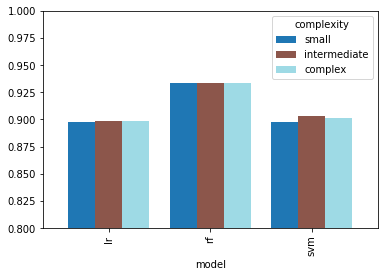

In [254]:
ax = results_test.groupby(['model','complexity'],sort=False).sum()['tn_rate'].unstack().plot(kind="bar",width = .8, cmap='tab20')
ax.set_ylim([0.8, 1])

**Performance discussion**

General: most what we can see makes intuitively sense. the performance is relatively even for differing model complexities, even though the complex model uses a multiple of the features that the simple one uses. This we can explain with our initial observation of the highly impbalanced features importances, focused on a small number of features. As the most valuable information is therefore captured within a small amount of features, using these features will already achieve close to the highest possible performance. Increasing the complexity of the dataset with features with low information value makes it more prone to overfitting and the little generalization information value fails to increaes the performance significantly. This is also reflected in the models as low complexity, despite the large feature and sample space turned out to perform the best. Another interesting observation is that the trees were overall better for the optimal TN ratio but at the same time sacrificed precision for it. That shows the exact tradeoff betwee more False Positive for fewer False Negatives that we were willing to take. At the same time we have double checked whether the model just heavily favors a specific class for predictions that inflates the performance, which was not the case.

Models: 

- as expected logistic regression has a weaker performance, even though the difference is marginal.the still high performance points towards the fact that input and output variables are highly correlated. 

- The random forest has the highest performance overall, which also seems reasonable. the decision tree proved to be good in modeling the data and the random forest allows to make the trees more complex while at the same time fighting overfitting by iteratively optimizing new trees with a subset of features. This allows to capture more detail in the data while still keeping variance low. we can observe that the lowest tree depth of 1 ended up performing the best with insignificant differences to slightly higher depths. The slightly lower performance in the most complex model we can attribute to the nature of the random forest, as it selects a subset of features each time. The higher feature space makes it more prone to not select the very limited set of most valuable features. There also might be some noise in the additional featuers. However, differences are barely existent. Since lowest tree depths performed the best, more features could not add much value as the same most valuable features were identified and applied each time 

- SVMs generally performed also well, but comparably lower than the tree classifiers. SVMs unfortunately struggle with large datasets and thus were not optimal for the number of features. The training was also suboptimal since I had to base it on a single 10% sample due to computing power restrictions. Thus its underperformance cannot reliably be accounted to the model itself. However, the SVMs perform particularly well in higher features spaces, since for our model a very limited set of features was important, its advantages were likely underutilized. 


**Results for real-world use case discussion**

It needs to be acknowledged that the used dataset were actual transactions of P2P loans in the United States and the share of approximately 40% for defaulted loans is therefore representative for the used low investment grades. Considering this, an uninformed investor can be assumed to make a randomized decision to invest in any of the available P2P loans on the platform. Their chances to get the full investment and the envisioned interest is therefore 60% by randomly picking an investment. Accordingly, having for instance the optimized random forest classifier with a True Negative performance of 93%+ predict an investment as non-risky by feeding it the intermediate feature space would be a huge boost in likelihood to pick an investment that will pay out as anticipated. Important to note is that the true negative ratio is the only thing really important here. While there is a higher share of False Positives (wrongly predicted risky investments), that does not harm our decision for an investment. An investor will only want to pick a very limited set of available investments and thus, can easily choose among the predicted Negatives with low chance of picking a False Negative, while some of the Negatives are classified as False Positives. 

Generally reflecting on the performance, it is engaging to see how the Fico range alone, and also very few other features in combination with it, managed to achieve such high confidence in predicting low risk of a high-risk investment, particularly in comparison with the actual rate of investments that had to be charged off. Accordingly many of the considerations made in engineering features and choosing and optimizing models were not necessary as also a simple decision tree would have been able to achieve a very high performance. Nonetheless this does not harm the utility of the model, which was the ultimate goal of the project.